In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import geopandas as gpd
from pywaffle import Waffle
import plotly.express as px
import seaborn as sns
import folium
from folium import IFrame

# Exploration et visualisation des données de l'association Merterre pour le projet Zero Dechet Sauvage

Cette exploration des données a vocation à permettre de mieux apprehender et comprendre les données concernant les dechets issus de ramassages aggrégées et mises à dispositon en open data par l'association Merterre afin de concevoir un dashboard destiné aux collectivités (villes, regions, départements et structure de gestion de milieux naturels)

## Import des librairies et données

In [2]:
PATH = "~/Documents/D4G/Saison12/MERTERRE/MerterreGithub/12_zero_dechet_sauvage/Exploration_visualisation/data/"

# nombre maximum de colonnes à afficher = 1500
pd.set_option('display.max_columns', 1500)

# import données structures et niveaux de caracterisation et fichier geojson france
df_niveaux_dechets = pd.read_excel(PATH+"Déchets-Niveaux2-3.xlsx")
df_structures = pd.read_excel(PATH+"export_structures_29022024.xlsx")
df_surf_lin = pd.read_excel(PATH+"releves_corrects_surf_lineaire.xlsx")
gdf = gpd.read_file(PATH+"a-com2022.json")

# import correspondance dechets
df_corr_dechets_materiau = pd.read_excel(PATH+"Correspondance_Dechet_Materiaux.xlsx")

# import du fichier excel des données nettoyées par le sript python "cleaning.py" dans un dataframe et visualisation des premieres lignes
df_enriched_bdd_zds = pd.read_excel(PATH+"data_zds_enriched.xlsx")
df_data_releve_nb_dechet = pd.read_csv(PATH+"data_releve_nb_dechet.csv")
df_data_zds_enriched = pd.read_csv(PATH+"data_zds_enriched.csv")
df_enriched_bdd_zds.head()

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
0         12    France  Provence-Alpes-Côte d'Azur       13.0   
1         14    France  Provence-Alpes-Côte d'Azur       13.0   
2         16    France  Provence-Alpes-Côte d'Azur       13.0   
3         17    France  Provence-Alpes-Côte d'Azur       13.0   
4         21    France                   Occitanie       34.0   

           LIEU_VILLE  LIEU_CODE_POSTAL  \
0           Marseille           13008.0   
1           Marseille           13008.0   
2              Cassis           13260.0   
3           Marseille           13015.0   
4  Causse-de-la-Selle           34380.0   

                          LIEU_COORD_GPS  LIEU_COORD_GPS_X  LIEU_COORD_GPS_Y  \
0  ["5.3416741728752","43.213786286934"]          5.341674         43.213786   
1  ["5.3429503182801","43.213941067785"]          5.342950         43.213941   
2  ["5.5392828683314","43.226082263728"]          5.539283         43.226082   
3               ["5.363345","43.353322"]          5.363345         43.353322   
4  ["3.6599318889266","43.795834831668"]          3.659932         43.795835   

                                            NOM_ZONE  SPOT_A1S  SPOT_ID  \
0                               Anse de la Maronaise         1      1.0   
1                               Anse de la Maronaise         1      1.0   
2  Vallat dres Brayes et bords des routes des ale...         0      NaN   
3                           La cascade des Aygalades         0      NaN   
4  Gorges de l'Hérault du Barrage de St MArtin de...         0      NaN   

                                           TYPE_LIEU  \
0  Littoral (terrestre)/Plage (sable, galets, gra...   
1  Littoral (terrestre)/Espace naturel en arrière...   
2  Zone naturelle ou rurale (hors littoral et mon...   
3           Cours d'eau/Berge naturelle (hors plage)   
4           Cours d'eau/Berge naturelle (hors plage)   

                                         TYPE_MILIEU  \
0                               Littoral (terrestre)   
1                               Littoral (terrestre)   
2  Zone naturelle ou rurale (hors littoral et mon...   
3                                        Cours d'eau   
4                                        Cours d'eau   

                                          TYPE_LIEU2  \
0                  Plage (sable, galets, gravillons)   
1  Espace naturel en arrière plage/côte (calanque...   
2                                        Multi-lieux   
3                       Berge naturelle (hors plage)   
4                       Berge naturelle (hors plage)   

                            TYPE_DECHET  LONGUEUR_LINEAIRE       SURFACE  \
0                                Echoué             2500.0  5.855528e+04   
1            Présent au sol (abandonné)             2770.0  1.522318e+05   
2            Présent au sol (abandonné)             1500.0  4.347502e+04   
3  Présent au sol (abandonné) et échoué                NaN           NaN   
4  Présent au sol (abandonné) et échoué            18000.0  1.274082e+06   

   ID_EVENEMENT                     NOM_EVENEMENT TYPE_EVENEMENT  \
0         178.0  Calanques Propres 2019 Maronaise      ramassage   
1         178.0  Calanques Propres 2019 Maronaise      ramassage   
2         222.0    Nettoyage du Vallat des Brayes      ramassage   
3         365.0          Opération Plastic Valley      ramassage   
4         139.0            De la rivière à la mer      ramassage   

  EVENEMENT_ENVERGURE                 DATE  ANNEE               NOM_STRUCTURE  \
0   Calanques Propres  2019-05-25 00:00:00   2019                    MerTerre   
1   Calanques Propres  2019-05-25 00:00:00   2019                    MerTerre   
2   Calanques Propres  2019-05-25 00:00:00   2019              Le Naturoscope   
3   Calanques Propres  2019-05-25 00:00:00   2019  La Cité des Arts de la Rue   
4                 NaN  2019-05-19 00:00:00   2019                  CAP Océans   

   ID_STRUCTURE  NB_PARTICIPANTS  DUREE  NIVEAU_CARAC  VE

In [3]:
df_enriched_bdd_zds.shape

(2796, 1302)

In [4]:
# données de structure
df_structures.head()

ID_STRUCT                                     NOM  \
0        745                                 CareMor   
1        744                        Ecole Notre-Dame   
2        743                           J’aime ma mer   
3        742  Conservatoire d'espaces naturels Corse   
4        741                              Région Sud   

                                      SOUS_TYPE  \
0                                           NaN   
1                                École primaire   
2  Association de protection de l'environnement   
3  Association de protection de l'environnement   
4                                        Région   

                                                TYPE  \
0                  Organisation socioprofessionnelle   
1  Établissement scolaire ou d'enseignement supér...   
2                          Association ou fédération   
3                          Association ou fédération   
4                          Collectivité territoriale   

                                             ADRESSE  CODE_POSTAL  \
0  Pleumeur-Bodou, Lannion, Côtes-d'Armor, Bretag...      22560.0   
1  École primaire privée Notre-Dame, 78, Route de...      34300.0   
2  Strada Suttana, Piève, Calvi, Haute-Corse, Cor...      20246.0   
3  Conservatoire d'espaces naturels de Corse, 871...      20290.0   
4  Place Jules Guesde, Saint-Lazare, 3e Arrondiss...      13003.0   

               DEPT                      REGION       REFERENT     TELEPHONE  \
0     Côtes-d'Armor                    Bretagne   Yuna Le Meur    0674265683   
1           Hérault                   Occitanie    Yves DANDOY  +33675624930   
2       Haute-Corse                       Corse     Loïc Paris    0609669847   
3       Haute-Corse                       Corse  Thomas MULLER    0673848327   
4  Bouches-du-Rhône  Provence-Alpes-Côte d'Azur            NaN    0491575757   

                      COURRIEL                        PERIMETRE_ACTION  \
0       yuna.le-meur@orange.fr                 Bretagne; Côtes d'Armor   
1           dandoy.y@gmail.com        Occitanie; Herault; Agde (34300)   
2         Jmamer2022@gmail.com       Corse; Haute Corse; Borgo (20290)   
3  thomas.muller@cen-corse.org        Corse; Haute Corse; Corse du Sud   
4     webpresse@maregionsud.fr  Région Sud Provence Alpes Côtes D'Azur   

                                     OBJET_PRINCIPAL DATE_INSCRIPTION  \
0  L'intention est de dynamiser et de réinventer ...       2024/02/27   
1                           Aire terrestre éducative       2024/02/27   
2  Sensibilisation des enfants à la pollution pla...       2024/02/24   
3  Connaitre (suivis scientifiques)\nProtéger (ge...       2024/02/21   
4                          Collectivité Territoriale       2024/02/19   

  PF_INSCRIPTION  ACTION_RAMASSAGE  ACTION_PROTECTION  ACTION_PLAIDOYER  \
0       national                 1                  1                 0   
1       national                 1                  1                 0   
2       national                 1                  1                 0   
3       national                 1                  1                 0   
4          remed                 1                  1                 0   

   ACTION_VALORISATION  ACTION_INNOVATION  ACTION_ETUDES  LIEU_LITTORAL_PORT  \
0                    0                  1              0                   1   
1                    0                  0              0                   0   
2                    0                  0              0                   1   
3                    0                  0              1                   1   
4                    1                  0              0                   1   

   LIEU_MER_OCEAN  LIEU_LACS_COURS  LIEU_URBAIN  LIEU_RURAL  \
0               0                0            0           0   
1               0                0            1           1   
2               0                0            0           0   
3               1                1            1           

In [5]:
# Récolte d'informations et stockage dans le fichier enriched_df_info.txt
import io
buffer = io.StringIO()
df_enriched_bdd_zds.info(verbose=True, buf=buffer)
s = buffer.getvalue()
with open("enriched_df_info.txt", "w", encoding="utf-8") as f:
    f.write(s)

## Constat
* On distingue 7 parties dans les données
  1. Les informations concernant l'évènement - *colonnes 0 à 34*
  2. Les informations concernant les caractéritiques globales par type de materiau de la collecte - *colonnes 35 à 51*
      * globales, pour le pourcentage composition déchet
      * globales, pour le volume composition déchet
  3. Les informations relatives aux nombres de sacs par types de materiau - *colonnes 52 à 75*
      * sacs pourcentage composition déchet
      * sacs volume composition déchet
      * sacs poids composition déchet
  4. Les informations relatives aux volumineux - *colonnes 76 à 92*
      * pourcentage composition déchet
      * volume composition déchet
      * commentaires éventuels
  5. Les informations relatives aux dechets spécifiques - *colonnes 93 à 1289*
      * denombrement individuel de dechet
      * 93 à 226 type "GROUPE"
      * 227 à 529 type "DCSMM"
      * 530 et 531 autres dechets : 530 description (string) et 531 denombrement
      * 532 à 1246 type "MARQUE"
      * 1247 à 1264 type "REP"
      * 1265 à 1289 type "SECTEUR"
  6. Une colonne de commentaires
      * 1290 commentaire (str)
  7. Les colonnes de collectivités générées par le script
      * 1291 à 1301

In [6]:
# Visualisation des colonnes générées par le script de cleaning 
df_enriched_bdd_zds.iloc[:,1291:1301]

commune INSEE_COM DEP  REG       EPCI NATURE_EPCI  \
0                     Marseille     13055  13   93  200054807          ME   
1                     Marseille     13055  13   93  200054807          ME   
2                        Cassis     13022  13   93  200054807          ME   
3                     Marseille     13055  13   93  200054807          ME   
4            Causse-de-la-Selle     34060  34   76  200022986          CC   
...                         ...       ...  ..  ...        ...         ...   
2791                  Marignane     13054  13   93  200054807          ME   
2792  Châteauneuf-les-Martigues     13026  13   93  200054807          ME   
2793               Saint-Chamas     13092  13   93  200054807          ME   
2794                      Paris     75056  75   11  200054781          ME   
2795                       Lyon     69123  69   84  200046977     METLYON   

     BV2022                             LIBEPCI       DEPARTEMENT  \
0     13055  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
1     13055  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2     13022  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
3     13055  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
4     34111          CC du Grand Pic Saint-Loup           Hérault   
...     ...                                 ...               ...   
2791  13054  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2792  13054  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2793  13063  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2794  75056            Métropole du Grand Paris             Paris   
2795  69123                   Métropole de Lyon             Rhône   

                          REGION  
0     Provence-Alpes-Côte d'Azur  
1     Provence-Alpes-Côte d'Azur  
2     Provence-Alpes-Côte d'Azur  
3     Provence-Alpes-Côte d'Azur  
4                      Occitanie  
...                          ...  
2791  Provence-Alpes-Côte d'Azur  
2792  Provence-Alpes-Côte d'Azur  
2793  Provence-Alpes-Côte d'Azur  
2794               Île-de-France  
2795        Auvergne-Rhône-Alpes  

[2796 rows x 10 columns]

## Evenements

#### Nombre total de comptages

In [7]:
print("Le volume total de comptages de dechets réalisés pas l'association Merterre depuis 2017 est de : "+str(df_enriched_bdd_zds["ID_RELEVE"].count()))

Le volume total de comptages de dechets réalisés pas l'association Merterre depuis 2017 est de : 2796


#### Nombre de comptages par an

In [8]:
# Changement dy type de la colonne de date :
print(df_enriched_bdd_zds["DATE"].dtype)
df_enriched_bdd_zds["DATE"] = pd.to_datetime(df_enriched_bdd_zds["DATE"])
print(df_enriched_bdd_zds["DATE"].dtype)

object
datetime64[ns]


In [9]:
# Ajout variable année
df_raw_enriched_bdd_zds = df_enriched_bdd_zds.copy()
df_comptages = df_enriched_bdd_zds.copy()
df_comptages['ANNEE'] = df_comptages['DATE'].dt.year

# Grouper par année et compter le nombre d'événements
df_comptages = df_comptages.groupby('ANNEE')['ID_RELEVE'].count().reset_index(name='NOMBRE_EVENEMENTS')

# Afficher le DataFrame agrégé
df_comptages


ANNEE  NOMBRE_EVENEMENTS
0   2017                 12
1   2018                 13
2   2019                 57
3   2020                156
4   2021                624
5   2022                961
6   2023                973

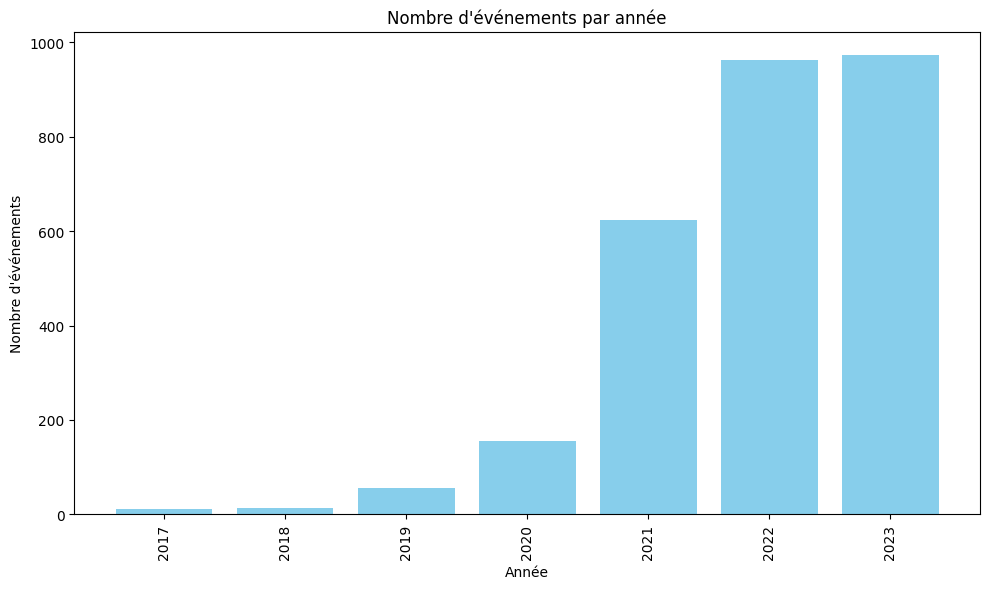

In [10]:
# Barplot du nombre de comptages par années
plt.figure(figsize=(10, 6))
plt.bar(df_comptages['ANNEE'], df_comptages['NOMBRE_EVENEMENTS'], color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre d\'événements')
plt.title('Nombre d\'événements par année')
plt.xticks(df_comptages['ANNEE'], rotation='vertical')
plt.tight_layout()
plt.show()

## Structures

In [11]:
print("Le nombre de structures ayant effectué des comptages pour l'association Merterre depuis 2017 est de : "+str(df_enriched_bdd_zds["ID_STRUCTURE"].nunique()))

Le nombre de structures ayant effectué des comptages pour l'association Merterre depuis 2017 est de : 257


In [12]:
print("Le nombre de structures dont les comptages sont enregistrés par l'association Merterre depuis 2017 est de : "+str(df_structures["ID_STRUCT"].nunique()))

Le nombre de structures dont les comptages sont enregistrés par l'association Merterre depuis 2017 est de : 578


## Collectivités

### Nombre d'evenements et structures en france actives par region, departements et communes

In [13]:
# dataframe simplifié pôur explo collectivités 
colonnes = list(range(0, 29)) + list(range(1291, 1301))
df_coll = df_raw_enriched_bdd_zds.iloc[:, colonnes]


# Pour les régions
df_regions = df_coll.groupby('REG').agg(
    Nombre_de_structures=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='nunique'),
    Nombre_d_evenements=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='count')  # Supposant que chaque ligne représente un événement
).reset_index().sort_values(by=['Nombre_de_structures', 'Nombre_d_evenements'], ascending=False)

# Pour les départements
df_dep = df_coll.groupby('DEP').agg(
    Nombre_de_structures=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='nunique'),
    Nombre_d_evenements=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='count')
).reset_index().sort_values(by=['Nombre_de_structures', 'Nombre_d_evenements'], ascending=False)

# Pour les communes
df_communes = df_coll.groupby('commune').agg(
    Nombre_de_structures=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='nunique'),
    Nombre_d_evenements=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='count')
).reset_index().sort_values(by=['Nombre_de_structures', 'Nombre_d_evenements'], ascending=False)

In [14]:
df_regions.head()

REG  Nombre_de_structures  Nombre_d_evenements
11   93                   150                 1542
9    76                    50                  381
7    53                    22                  176
10   84                    20                  182
8    75                    14                  274

In [15]:
df_dep.head()

DEP  Nombre_de_structures  Nombre_d_evenements
7   13                    98                  887
57  83                    42                  483
22  34                    22                  214
3   06                    20                  132
15  29                    17                  139

In [16]:
df_communes.head()

commune  Nombre_de_structures  Nombre_d_evenements
221  Marseille                    67                  429
138     Hyères                    11                   71
268   Ouessant                    10                   75
386     Toulon                     9                   98
147  La Ciotat                     8                   62

In [17]:
# fichier geojson

gdf.head()

codgeo dep reg  xcl2154  ycl2154                   libgeo  \
0  01001  01  84   848241  6563021  L'Abergement-Clémenciat   
1  01002  01  84   887495  6548152    L'Abergement-de-Varey   
2  01004  01  84   882724  6542583        Ambérieu-en-Bugey   
3  01005  01  84   847277  6545791      Ambérieux-en-Dombes   
4  01006  01  84   902191  6519791                  Ambléon   

                                            geometry  
0  POLYGON ((4.90497 46.16079, 4.90280 46.15795, ...  
1  POLYGON ((5.40440 46.00778, 5.41628 46.00056, ...  
2  POLYGON ((5.38637 45.93121, 5.38892 45.93320, ...  
3  POLYGON ((4.88657 46.01602, 4.88808 46.01061, ...  
4  POLYGON ((5.59066 45.75997, 5.58396 45.76274, ...

### Cartes regions

Visualisation de la distribution spatiale du nombre de structures par régions sur une carte choroplèthe

Text(0.5, 1.0, 'Nombre de structures par regions')

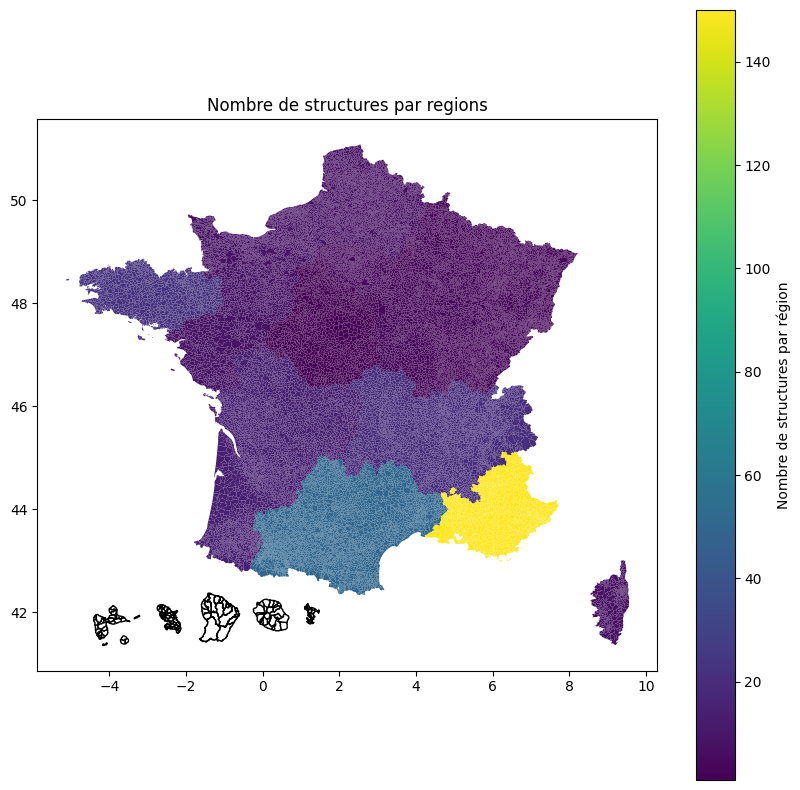

In [18]:
# Carte des regions en les nombres de structures présentes

gdf['reg'] = gdf['reg'].astype(str)
df_regions['REG'] = df_regions['REG'].astype(str)
gdf_reg = gdf.merge(df_regions[['REG', 'Nombre_de_structures', 'Nombre_d_evenements']], left_on='reg', right_on='REG', how='left')
gdf_reg['has_data'] = gdf_reg['Nombre_de_structures'].notnull()


gdf_reg['Nombre_de_structures'] = pd.to_numeric(gdf_reg['Nombre_de_structures'], errors='coerce')
gdf_reg['Nombre_d_evenements'] = pd.to_numeric(gdf_reg['Nombre_d_evenements'], errors='coerce')

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_reg.plot(column='Nombre_de_structures', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre de structures par région"})
plt .title("Nombre de structures par regions")

Visualisation de la distribution spatiale d'évenements par régions sur une carte choroplèthe

Text(0.5, 1.0, "Nombre d'événements par région")

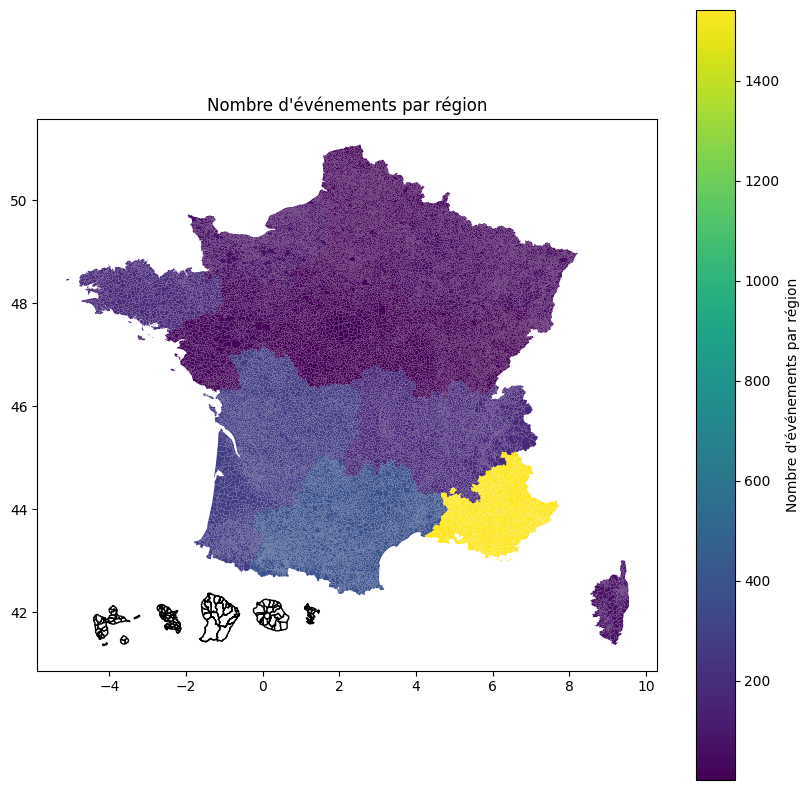

In [19]:
# Avec le nombre d'evenements présents
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_reg.plot(column='Nombre_d_evenements', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre d'événements par région"})
plt.title("Nombre d'événements par région")

### Cartes departements

Visualisation de la distribution spatiale du nombre de structures par départements sur une carte choroplèthe

Text(0.5, 1.0, 'Nombre de structures par départements')

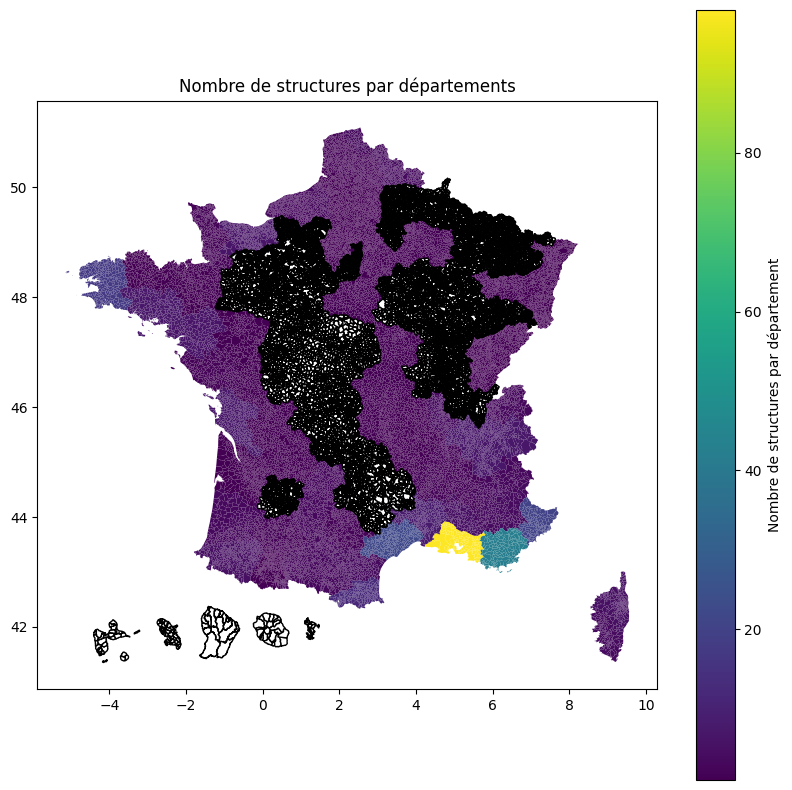

In [20]:
# Carte des departements en les nombres de structures présentes
gdf_dep = gdf.merge(df_dep[['DEP', 'Nombre_de_structures', 'Nombre_d_evenements']], left_on='dep', right_on='DEP', how='left')
gdf_dep['Nombre_de_structures'] = pd.to_numeric(gdf_dep['Nombre_de_structures'], errors='coerce')
gdf_dep['Nombre_d_evenements'] = pd.to_numeric(gdf_dep['Nombre_d_evenements'], errors='coerce')

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep.plot(column='Nombre_de_structures', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre de structures par département"})
plt.title("Nombre de structures par départements")

Visualisation de la distribution spatiale du nombre d'évenements par départements sur une carte choroplèthe

Text(0.5, 1.0, "Nombre d'événements par départements")

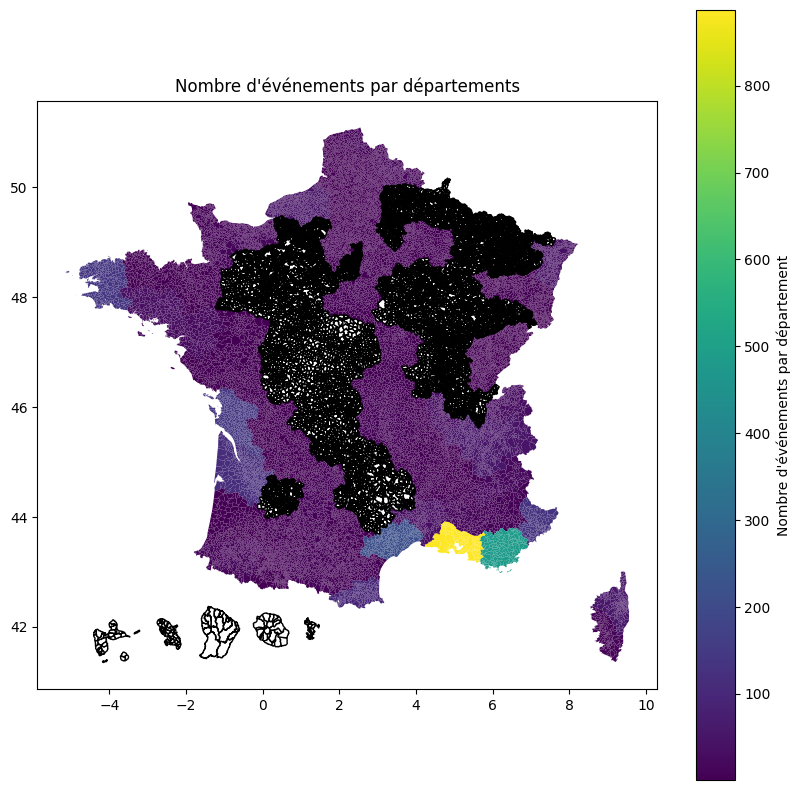

In [21]:
# Visualisations
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep.plot(column='Nombre_d_evenements', ax=ax, legend=True,
             cmap='viridis', 
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre d'événements par département"})
plt.title("Nombre d'événements par départements")

## Exploration données totaux et volumineux

### Ajout d'une Variable saison

L'ajout d'une variable saison dans les données permettra de filtrer par cette variable sur des dechets spécifiques pour voir par exemple l'impact du tourisme saisonnier

In [22]:
# Définition d'une fonction qui retourne la saison pour une date donnée
def get_saison(mois):
    if mois in [3, 4, 5]:
        return 'printemps'
    elif mois in [6, 7, 8]:
        return 'été'
    elif mois in [9, 10, 11]:
        return 'automne'
    else:
        return 'hiver'

# Ajout colonne saison
df_enriched_bdd_zds["SAISON"] = df_enriched_bdd_zds["DATE"].dt.month.apply(get_saison)


In [23]:
# liste des indices des colonnes à sélectionner
indices_colonnes_totaux_et_volumineux = list(range(0, 34)) + list(range(1291, 1303))

# Creation du df de travail
df_totaux_et_volumineux = df_enriched_bdd_zds.iloc[:, indices_colonnes_totaux_et_volumineux]
df_totaux_et_volumineux.head()

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
0         12    France  Provence-Alpes-Côte d'Azur       13.0   
1         14    France  Provence-Alpes-Côte d'Azur       13.0   
2         16    France  Provence-Alpes-Côte d'Azur       13.0   
3         17    France  Provence-Alpes-Côte d'Azur       13.0   
4         21    France                   Occitanie       34.0   

           LIEU_VILLE  LIEU_CODE_POSTAL  \
0           Marseille           13008.0   
1           Marseille           13008.0   
2              Cassis           13260.0   
3           Marseille           13015.0   
4  Causse-de-la-Selle           34380.0   

                          LIEU_COORD_GPS  LIEU_COORD_GPS_X  LIEU_COORD_GPS_Y  \
0  ["5.3416741728752","43.213786286934"]          5.341674         43.213786   
1  ["5.3429503182801","43.213941067785"]          5.342950         43.213941   
2  ["5.5392828683314","43.226082263728"]          5.539283         43.226082   
3               ["5.363345","43.353322"]          5.363345         43.353322   
4  ["3.6599318889266","43.795834831668"]          3.659932         43.795835   

                                            NOM_ZONE  SPOT_A1S  SPOT_ID  \
0                               Anse de la Maronaise         1      1.0   
1                               Anse de la Maronaise         1      1.0   
2  Vallat dres Brayes et bords des routes des ale...         0      NaN   
3                           La cascade des Aygalades         0      NaN   
4  Gorges de l'Hérault du Barrage de St MArtin de...         0      NaN   

                                           TYPE_LIEU  \
0  Littoral (terrestre)/Plage (sable, galets, gra...   
1  Littoral (terrestre)/Espace naturel en arrière...   
2  Zone naturelle ou rurale (hors littoral et mon...   
3           Cours d'eau/Berge naturelle (hors plage)   
4           Cours d'eau/Berge naturelle (hors plage)   

                                         TYPE_MILIEU  \
0                               Littoral (terrestre)   
1                               Littoral (terrestre)   
2  Zone naturelle ou rurale (hors littoral et mon...   
3                                        Cours d'eau   
4                                        Cours d'eau   

                                          TYPE_LIEU2  \
0                  Plage (sable, galets, gravillons)   
1  Espace naturel en arrière plage/côte (calanque...   
2                                        Multi-lieux   
3                       Berge naturelle (hors plage)   
4                       Berge naturelle (hors plage)   

                            TYPE_DECHET  LONGUEUR_LINEAIRE       SURFACE  \
0                                Echoué             2500.0  5.855528e+04   
1            Présent au sol (abandonné)             2770.0  1.522318e+05   
2            Présent au sol (abandonné)             1500.0  4.347502e+04   
3  Présent au sol (abandonné) et échoué                NaN           NaN   
4  Présent au sol (abandonné) et échoué            18000.0  1.274082e+06   

   ID_EVENEMENT                     NOM_EVENEMENT TYPE_EVENEMENT  \
0         178.0  Calanques Propres 2019 Maronaise      ramassage   
1         178.0  Calanques Propres 2019 Maronaise      ramassage   
2         222.0    Nettoyage du Vallat des Brayes      ramassage   
3         365.0          Opération Plastic Valley      ramassage   
4         139.0            De la rivière à la mer      ramassage   

  EVENEMENT_ENVERGURE       DATE  ANNEE               NOM_STRUCTURE  \
0   Calanques Propres 2019-05-25   2019                    MerTerre   
1   Calanques Propres 2019-05-25   2019                    MerTerre   
2   Calanques Propres 2019-05-25   2019              Le Naturoscope   
3   Calanques Propres 2019-05-25   2019  La Cité des Arts de la Rue   
4                 NaN 2019-05-19   2019                  CAP Océans   

   ID_STRUCTURE  NB_PARTICIPANTS  DUREE  NIVEAU_CARAC  VERSION_PROTOCOLE  \
0           145            100.0    5.0  

### Volumes totaux

#### Volume total de dechets récoltés 

In [24]:
# Volume total de dechets récoltés 
print("Le volume total de dechets récoltés par les actions de Merterre depuis 2017 est de : "+str(df_totaux_et_volumineux["VOLUME_TOTAL"].sum()) + " litres")

Le volume total de dechets récoltés par les actions de Merterre depuis 2017 est de : 3718703.3059999994 litres


#### Moyenne du volume de dechet récoltés par evenement

In [25]:
# Moyenne dans le volume de dechet récoltés par evenement
print("Le volume moyen de dechets récoltés par les actions de Merterre depuis 2017 est de : "+str(df_totaux_et_volumineux["VOLUME_TOTAL"].mean()) + " litres")

Le volume moyen de dechets récoltés par les actions de Merterre depuis 2017 est de : 1330.008335479256 litres


#### Distribution du volume de dechet récoltés par evenement

Visualisons la distribution de la variable de volume totaux de dechets récoltés par evenements

Text(0, 0.5, 'Volume Total')

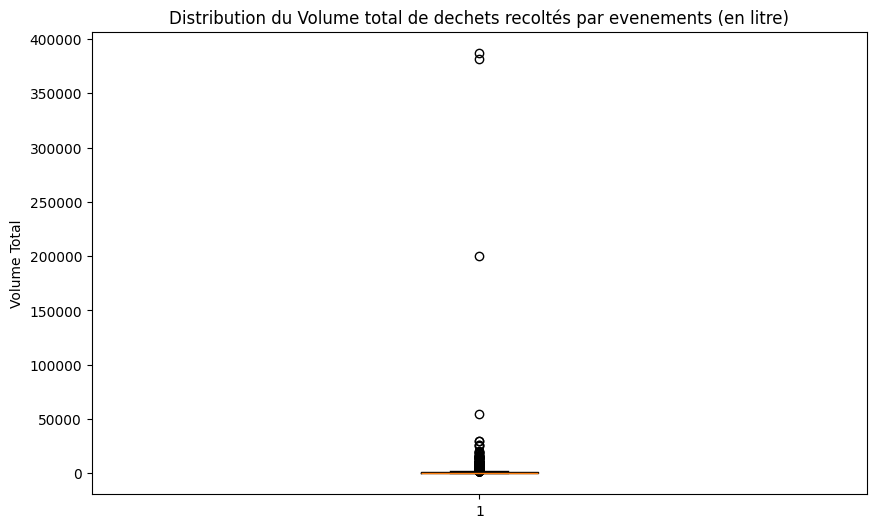

In [26]:
# Création du graphique à moustaches pour VOLUME_TOTAL
plt.figure(figsize=(10, 6))
plt.boxplot(df_totaux_et_volumineux["VOLUME_TOTAL"])
plt.title("Distribution du Volume total de dechets recoltés par evenements (en litre)")
plt.ylabel("Volume Total")

Les ouliers ne sont pars des erreurs, il s'agit de gros ramassages ou de rassemblements de ramassages

Text(0, 0.5, 'Volume Total')

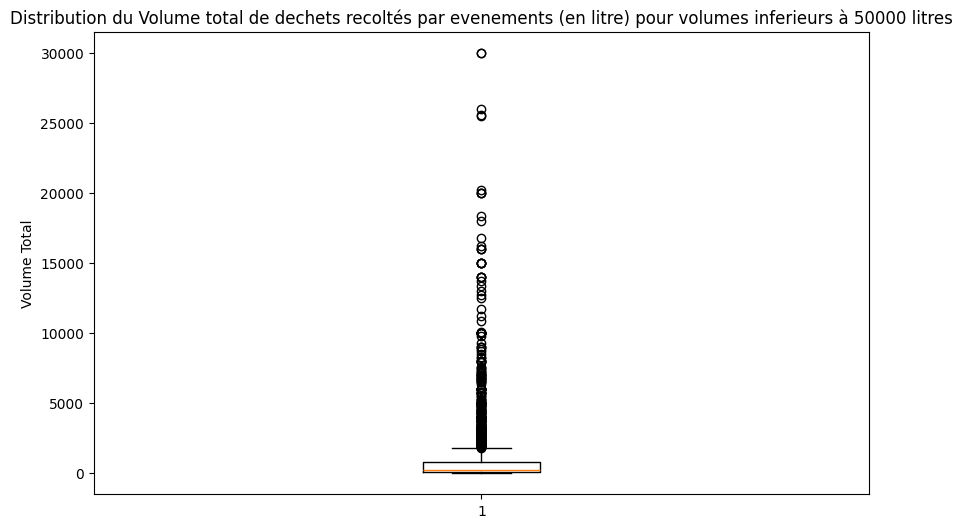

In [27]:
# Création du graphique à moustaches pour VOLUME_TOTAL < 50000
df_boxplot_50000 = df_totaux_et_volumineux[df_totaux_et_volumineux["VOLUME_TOTAL"]<50000]
plt.figure(figsize=(10, 6))
plt.boxplot(df_boxplot_50000["VOLUME_TOTAL"])
plt.title("Distribution du Volume total de dechets recoltés par evenements (en litre) pour volumes inferieurs à 50000 litres")
plt.ylabel("Volume Total")

#### Volumes totaux par type de materiau

In [28]:
# Liste des colonnes à vérifier pour NaN
colonnes_materiau = [
    "GLOBAL_VOLUME_PLASTIQUE", "GLOBAL_VOLUME_CAOUTCHOUC", "GLOBAL_VOLUME_BOIS",
    "GLOBAL_VOLUME_TEXTILE", "GLOBAL_VOLUME_PAPIER", "GLOBAL_VOLUME_METAL",
    "GLOBAL_VOLUME_VERRE", "GLOBAL_VOLUME_AUTRE"
]

# Création de df_enriched_bdd_zds_materiau en supprimant les lignes avec un NaN dans les colonnes spécifiées
df_enriched_bdd_zds_materiau = df_enriched_bdd_zds.dropna(subset=colonnes_materiau)

In [29]:
# Calcul des totaux et des moyennes pour chaque colonne matériau
total_materiau = df_enriched_bdd_zds_materiau[colonnes_materiau].sum()
moyenne_materiau = df_enriched_bdd_zds_materiau[colonnes_materiau].mean()

# Création d'un DataFrame avec les totaux et les moyennes
df_resume_materiau = pd.DataFrame({'Total': total_materiau, 'Moyenne': moyenne_materiau}).reset_index()
df_resume_materiau.sort_values(by = "Total", ascending = False, inplace = True)

# Renommage des colonnes pour une meilleure clarté
df_resume_materiau.rename(columns={'index': 'Materiau'}, inplace=True)

df_resume_materiau

Materiau          Total     Moyenne
0   GLOBAL_VOLUME_PLASTIQUE  768054.188216  296.088739
5       GLOBAL_VOLUME_METAL  439241.722933  169.329885
7       GLOBAL_VOLUME_AUTRE  330687.456900  127.481672
1  GLOBAL_VOLUME_CAOUTCHOUC  193729.245970   74.683595
6       GLOBAL_VOLUME_VERRE  179008.791005   69.008786
2        GLOBAL_VOLUME_BOIS  139856.656901   53.915442
4      GLOBAL_VOLUME_PAPIER  121522.473105   46.847522
3     GLOBAL_VOLUME_TEXTILE   94321.776170   36.361517

Text(0, 0.5, 'Total des Volumes')

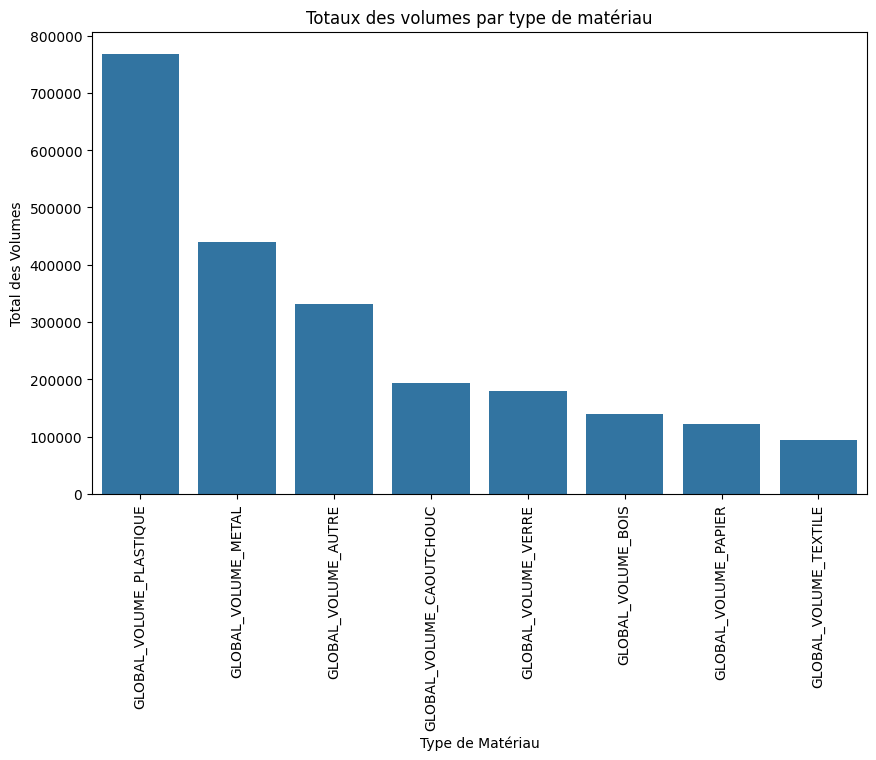

In [30]:
# Création du barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resume_materiau, x='Materiau', y='Total')

# Affichage
plt.xticks(rotation=90)
plt.title('Totaux des volumes par type de matériau')
plt.xlabel('Type de Matériau')
plt.ylabel('Total des Volumes')

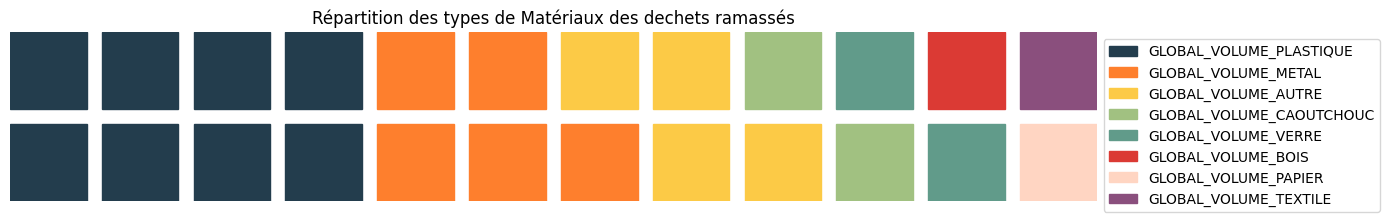

In [31]:
# Création du Waffle Chart

# Normalisation des valeurs
min_non_zero = df_resume_materiau['Total'][df_resume_materiau['Total'] > 0].min()
df_resume_materiau['Normalized'] = df_resume_materiau['Total'] / min_non_zero

# Utilisation des valeurs normalisées pour le waffle chart
data = pd.Series(df_resume_materiau.Normalized.values, index=df_resume_materiau.Materiau).to_dict()
fig = plt.figure(
    figsize=(14,9),
    FigureClass=Waffle, 
    rows=2,
    values=data, 
    colors=["#233D4D",  # Bleu foncé
    "#FE7F2D",
    "#FCCA46",
    "#A1C181",
    "#619B8A",
    "#DB3A34",
    "#FFD5C2",
    "#8A4F7D"
           ],
    title={'label': 'Répartition des types de Matériaux des dechets ramassés', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
#   icons='square',
    icon_size=100,
    icon_legend=True,
)


#### Volumes totaux mensuels

In [32]:
# nouvelle colonne 'YEAR_MONTH'
df_totaux_et_volumineux['YEAR_MONTH'] = df_totaux_et_volumineux['DATE'].dt.to_period('M')
# volume total mensuel
df_volume_total_mensuel = df_totaux_et_volumineux.groupby('YEAR_MONTH')['VOLUME_TOTAL'].sum().reset_index()

/tmp/ipykernel_25845/1190459112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totaux_et_volumineux['YEAR_MONTH'] = df_totaux_et_volumineux['DATE'].dt.to_period('M')


Text(0, 0.5, 'Volume Total')

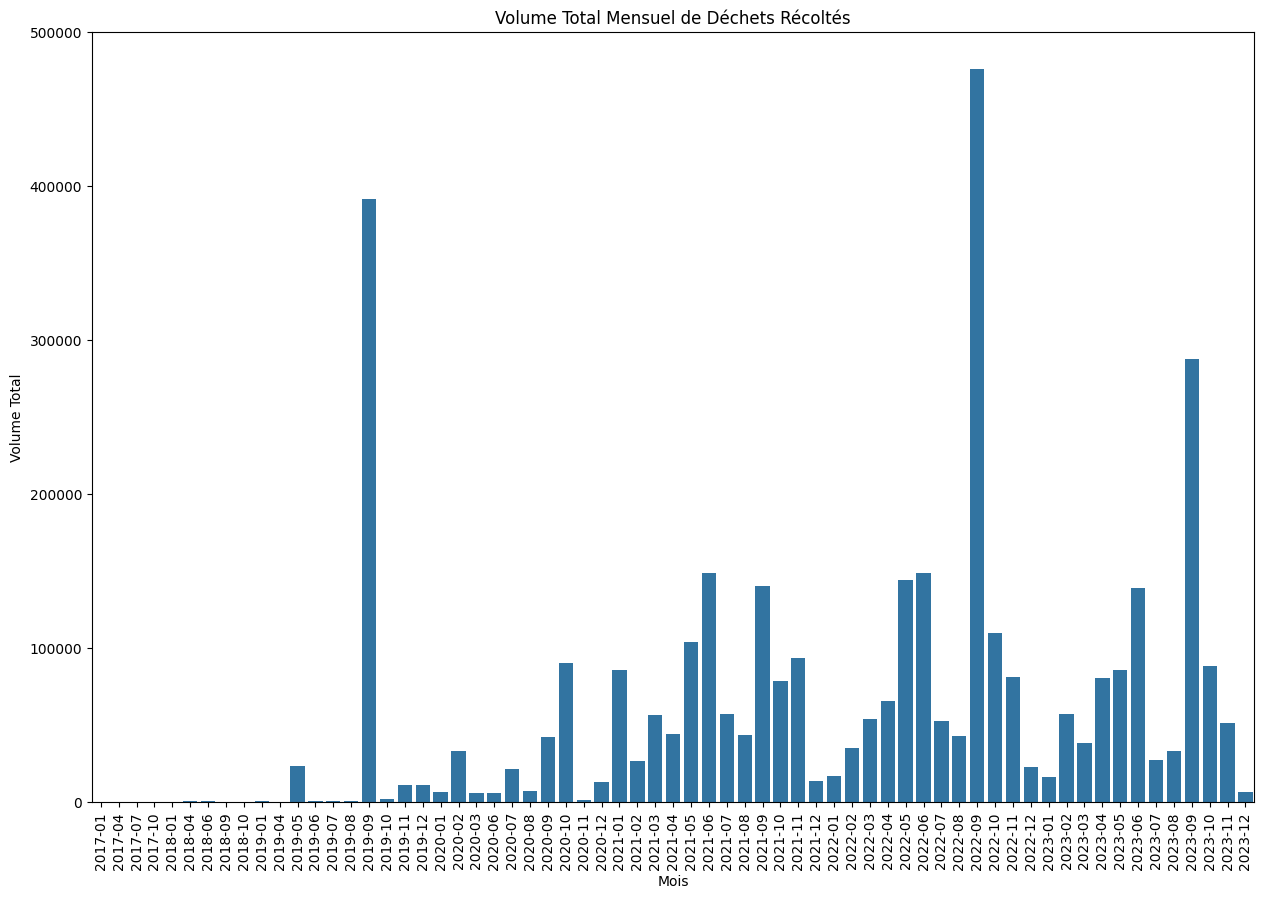

In [33]:
# Changement du type de colonne pour l'affichage
df_volume_total_mensuel['YEAR_MONTH'] = df_volume_total_mensuel['YEAR_MONTH'].astype(str)

plt.figure(figsize=(15, 10))
# Création du barplot
sns.barplot(x='YEAR_MONTH', y='VOLUME_TOTAL', data=df_volume_total_mensuel)

# Affichage
plt.xticks(rotation=90)
plt.title('Volume Total Mensuel de Déchets Récoltés')
plt.xlabel('Mois')
plt.ylabel('Volume Total')

Text(0, 0.5, 'Volume Total Moyen')

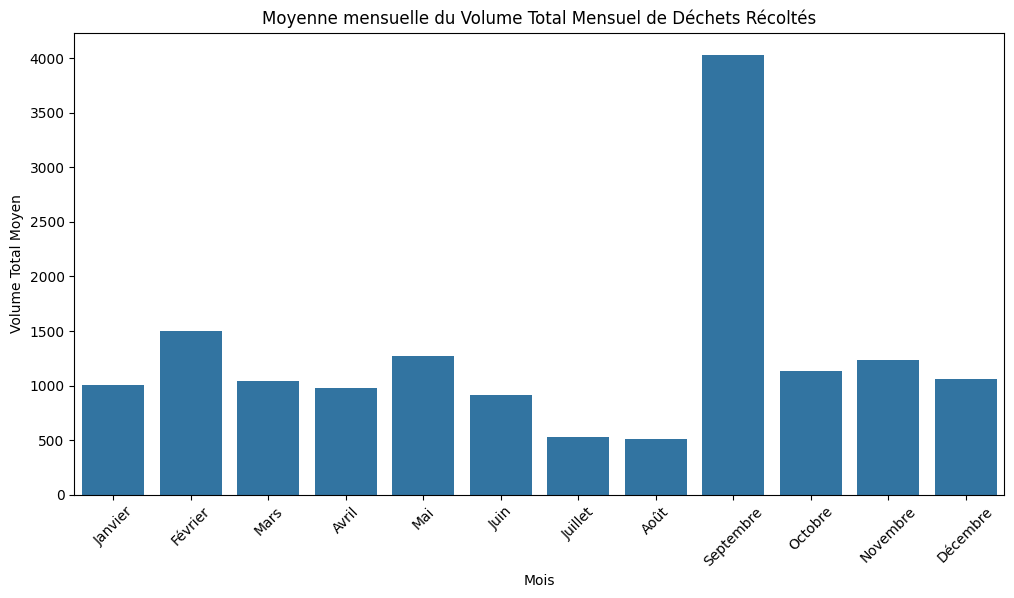

In [34]:
# Ajout d'une variable mois
df_enriched_bdd_zds['MONTH'] = df_enriched_bdd_zds['DATE'].dt.month

# Moyenne du volume total pour chaque mois
df_moyenne_mensuelle = df_enriched_bdd_zds.groupby('MONTH')['VOLUME_TOTAL'].mean().reset_index()

# Mapping pour convertir les mois de numéro à nom
mois_mapping = {1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin',
                7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'}

# mois en noms
df_moyenne_mensuelle['MONTH'] = df_moyenne_mensuelle['MONTH'].map(mois_mapping)

# Taille du graphique
plt.figure(figsize=(12, 6))

# Création du barplot
sns.barplot(x='MONTH', y='VOLUME_TOTAL', data=df_moyenne_mensuelle)

# Affichage
plt.xticks(rotation=45)
plt.title('Moyenne mensuelle du Volume Total Mensuel de Déchets Récoltés')
plt.xlabel('Mois')
plt.ylabel('Volume Total Moyen')

In [35]:
df_moyenne_mensuelle

MONTH  VOLUME_TOTAL
0     Janvier   1002.245952
1     Février   1501.137426
2        Mars   1041.077568
3       Avril    979.053231
4         Mai   1266.138333
5        Juin    915.934411
6     Juillet    526.704850
7        Août    514.500533
8   Septembre   4029.547560
9     Octobre   1129.351365
10   Novembre   1234.591140
11   Décembre   1057.369841

#### Volumes totaux departement/region/bassin de vie

##### Barplot region

Text(0, 0.5, 'Région')

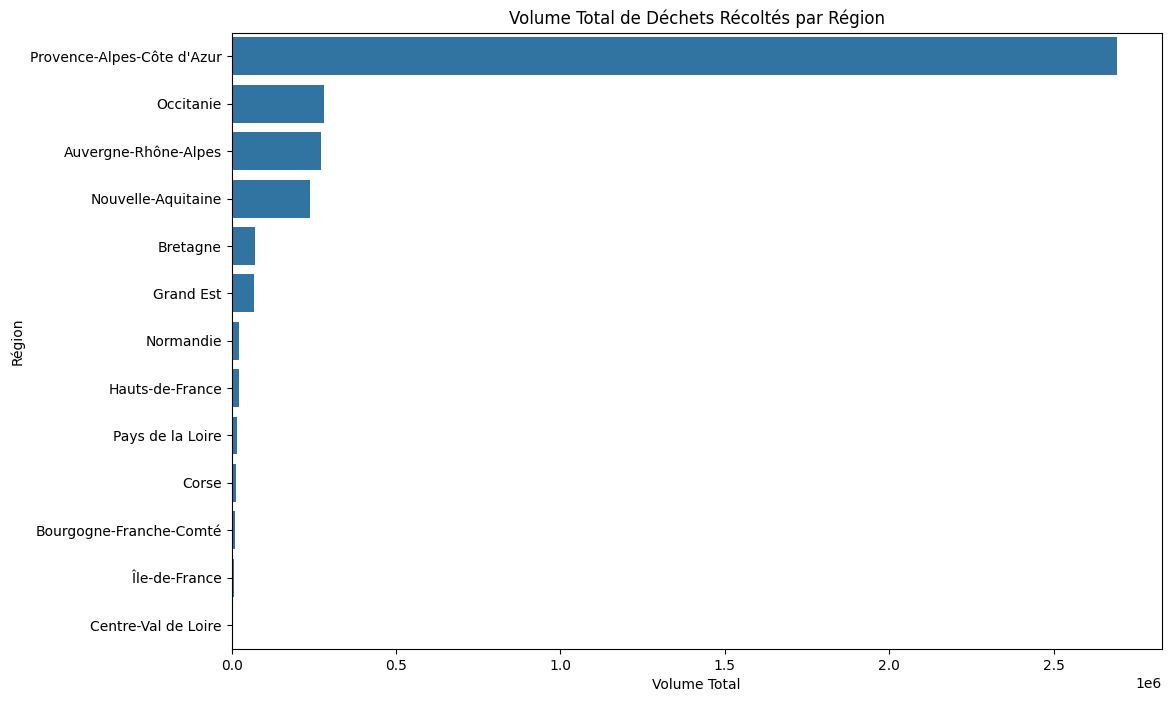

In [36]:
# Groupement par région et calcul du volume total
volume_par_region = df_enriched_bdd_zds.groupby('REGION')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats
volume_par_region_sorted = volume_par_region.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création du barplot pour le volume total par région
plt.figure(figsize=(12, 8))
sns.barplot(x='VOLUME_TOTAL', y='REGION', data=volume_par_region_sorted)
plt.title('Volume Total de Déchets Récoltés par Région')
plt.xlabel('Volume Total')
plt.ylabel('Région')

##### Carte Region

Text(0.5, 1.0, 'Volume total de dechets récoltés (en litres) par region')

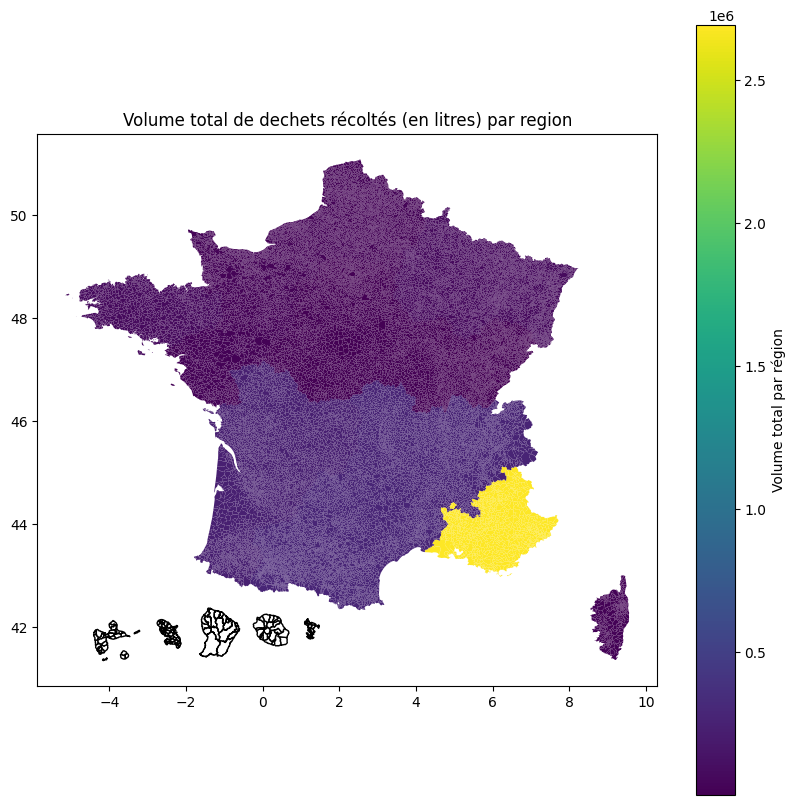

In [37]:
# Groupement par dregion et calcul du volume total
volume_par_region = df_enriched_bdd_zds.groupby('REG')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats pour une meilleure visualisation
volume_par_region_sorted = volume_par_region.sort_values(by='VOLUME_TOTAL', ascending=False)

# Carte des departements et des volumes de dechets

gdf['reg'] = gdf['reg'].astype(str)
volume_par_region_sorted['REG'] = volume_par_region_sorted['REG'].astype(str)
gdf_dep_volume = gdf.merge(volume_par_region_sorted, left_on='reg', right_on='REG', how='left')
gdf_dep_volume['VOLUME_TOTAL'] = pd.to_numeric(gdf_dep_volume['VOLUME_TOTAL'], errors='coerce')
# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep_volume.plot(column='VOLUME_TOTAL', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Volume total par région"})
plt.title("Volume total de dechets récoltés (en litres) par region")

##### Barplot departements

Text(0, 0.5, 'Département')

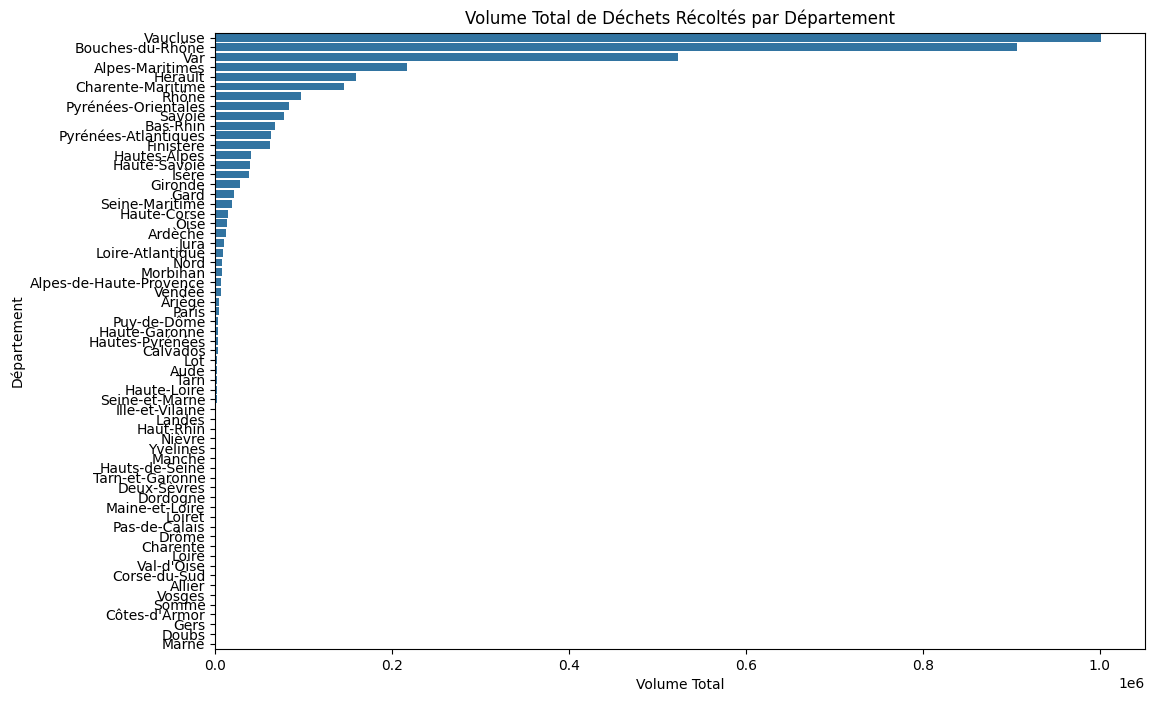

In [38]:
# Groupement par département et calcul du volume total
volume_par_departement = df_enriched_bdd_zds.groupby('DEPARTEMENT')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats pour une meilleure visualisation
volume_par_departement_sorted = volume_par_departement.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création du barplot pour le volume total par département
plt.figure(figsize=(12, 8))
sns.barplot(x='VOLUME_TOTAL', y='DEPARTEMENT', data=volume_par_departement_sorted)
plt.title('Volume Total de Déchets Récoltés par Département')
plt.xlabel('Volume Total')
plt.ylabel('Département')

##### Carte departement

Text(0.5, 1.0, 'Volume total de dechets récoltés (en litres) par département')

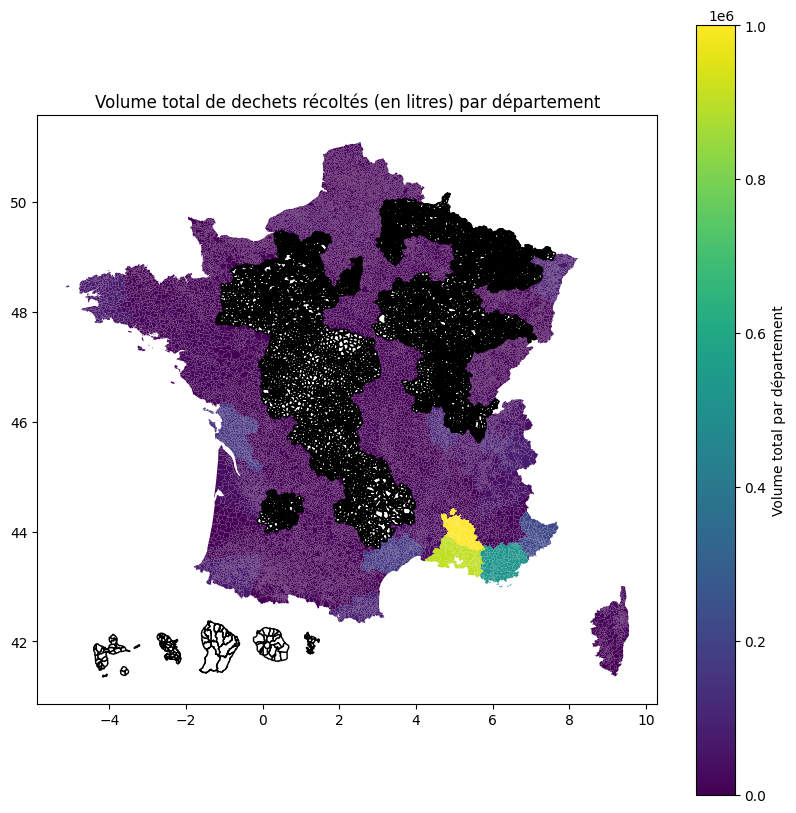

In [39]:
# Groupement par département et calcul du volume total
volume_par_departement = df_enriched_bdd_zds.groupby('DEP')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats pour une meilleure visualisation
volume_par_departement_sorted = volume_par_departement.sort_values(by='VOLUME_TOTAL', ascending=False)

# Carte des departements et des volumes de dechets

gdf['dep'] = gdf['dep'].astype(str)
volume_par_departement_sorted['DEP'] = volume_par_departement_sorted['DEP'].astype(str)
gdf_dep_volume = gdf.merge(volume_par_departement_sorted, left_on='dep', right_on='DEP', how='left')
gdf_dep_volume['VOLUME_TOTAL'] = pd.to_numeric(gdf_dep_volume['VOLUME_TOTAL'], errors='coerce')
# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep_volume.plot(column='VOLUME_TOTAL', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Volume total par département"})
plt.title("Volume total de dechets récoltés (en litres) par département")

##### Barplot Bassin de vie

Text(0, 0.5, 'Bassin de Vie')

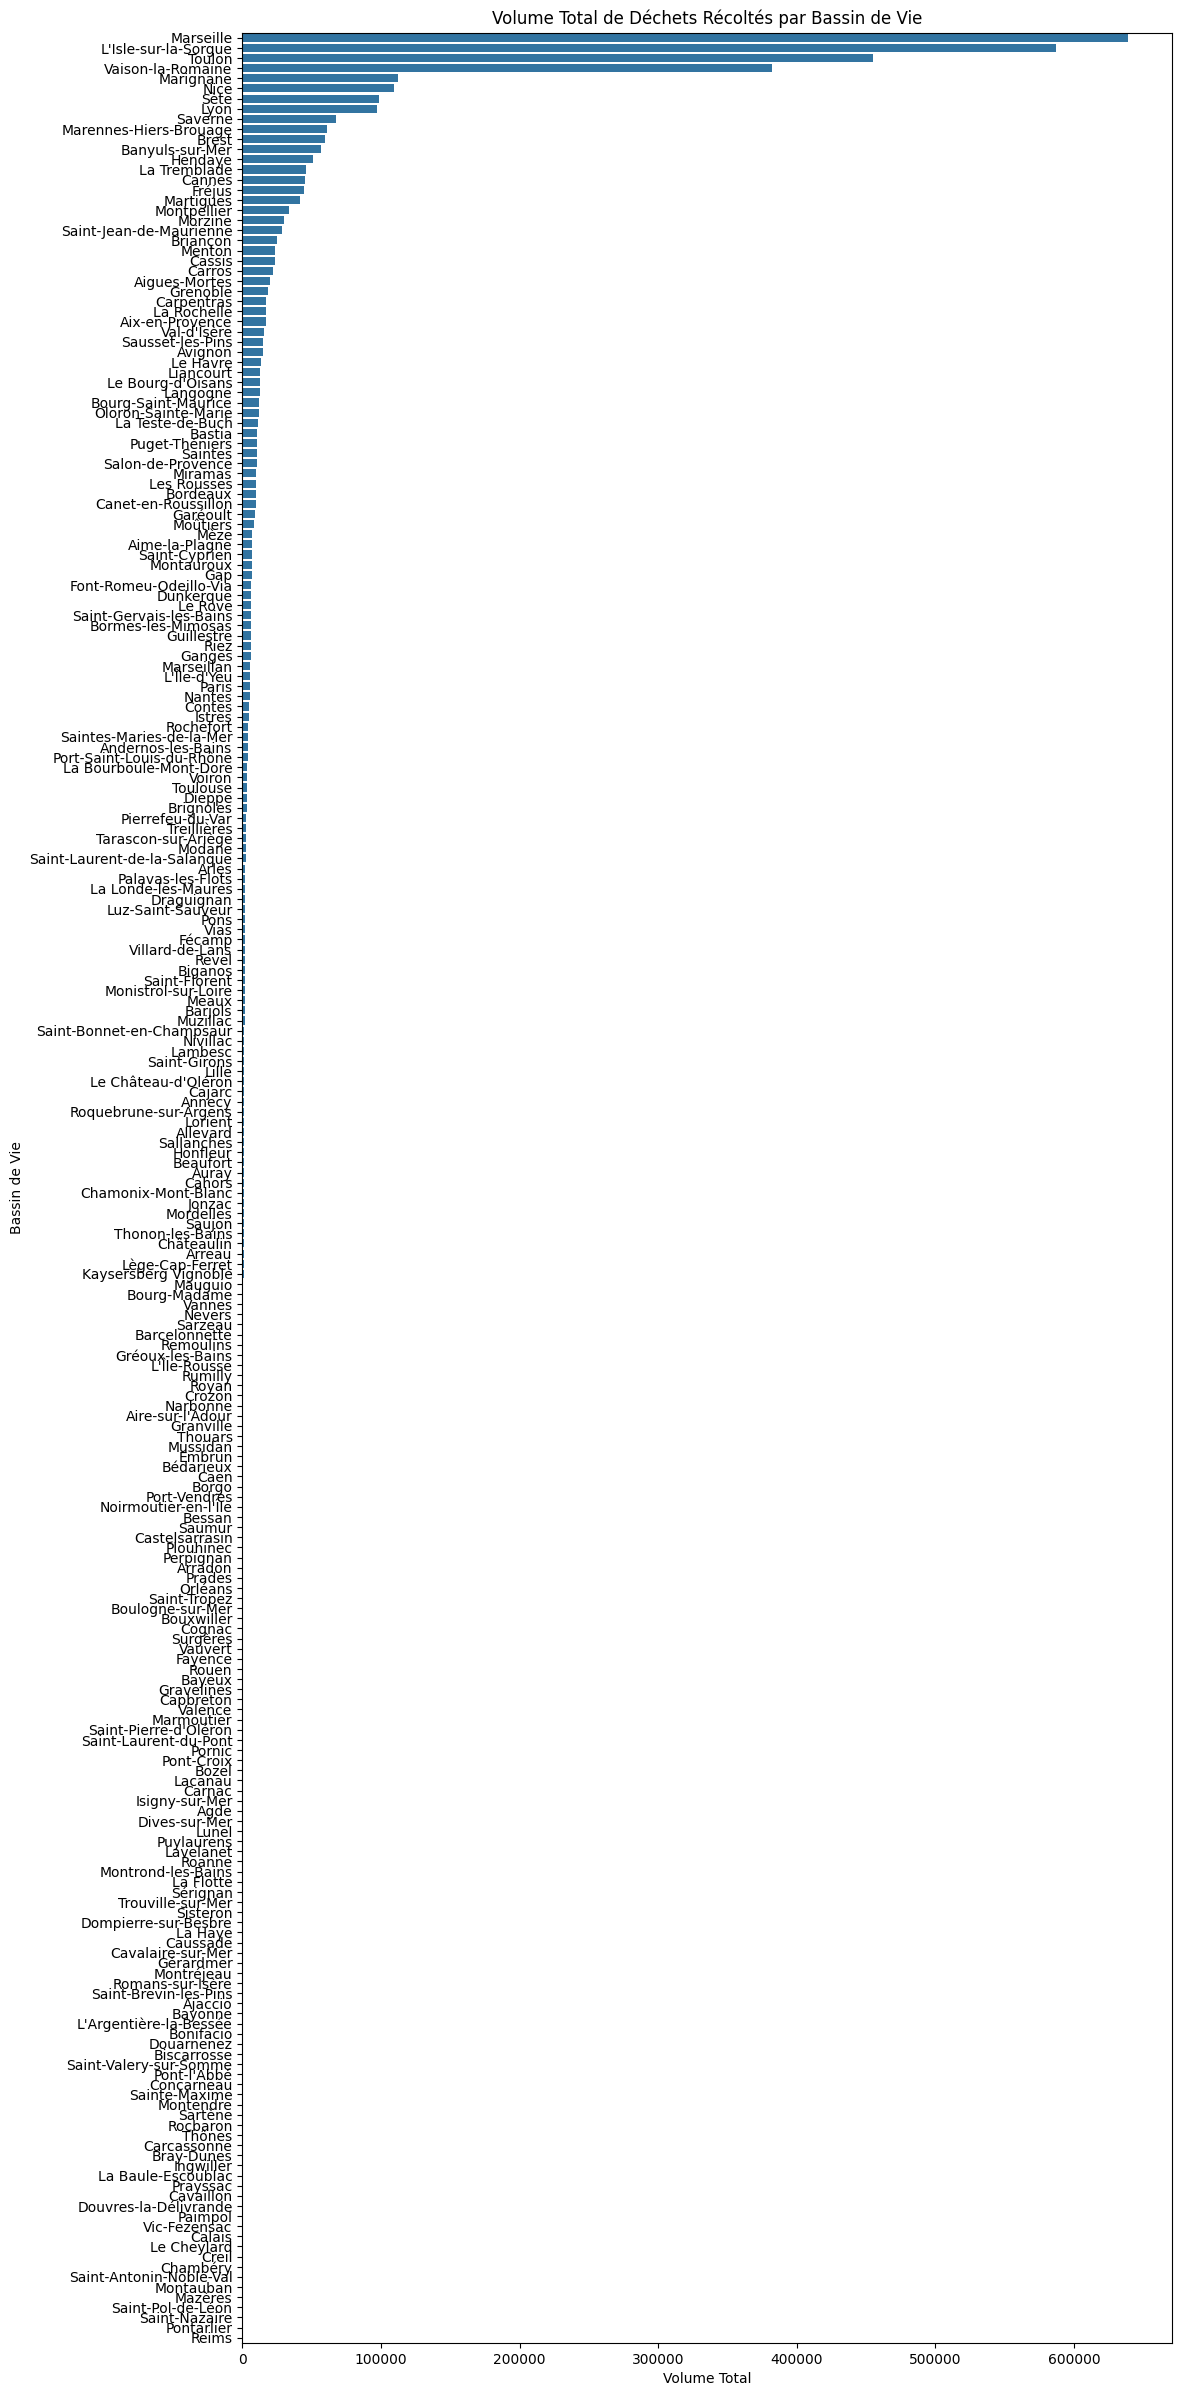

In [40]:
# Groupement par bassin de vie et calcul du volume total
volume_par_bassin = df_enriched_bdd_zds.groupby('BASSIN_DE_VIE')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats
volume_par_bassin_sorted = volume_par_bassin.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création du barplot pour le volume total par bassin de vie
plt.figure(figsize=(12, 30))
sns.barplot(x='VOLUME_TOTAL', y='BASSIN_DE_VIE', data=volume_par_bassin_sorted)
plt.title('Volume Total de Déchets Récoltés par Bassin de Vie')
plt.xlabel('Volume Total')
plt.ylabel('Bassin de Vie')

#### Volumes totaux types de lieux

In [41]:
# Quels sont les differents types de lieux ou ont lieu les ramassages?
df_enriched_bdd_zds['TYPE_LIEU'].unique()

array(['Littoral (terrestre)/Plage (sable, galets, gravillons)',
       'Littoral (terrestre)/Espace naturel en arrière plage/côte (calanques, colline …)',
       'Zone naturelle ou rurale (hors littoral et montagne)/Multi-lieux',
       "Cours d'eau/Berge naturelle (hors plage)",
       'Littoral (terrestre)/Digue et ouvrage',
       'Littoral (terrestre)/Rocher et crique',
       'Zone naturelle ou rurale (hors littoral et montagne)/Autre espace naturel',
       'Mer - Océan/Mer - Océan', 'Multi-lieux/Multi-lieux',
       'Zone naturelle ou rurale (hors littoral et montagne)/Route',
       'Littoral (terrestre)/Port', 'Zone urbaine/Route, rue, place',
       'Lagune et étang côtier/Canaux et Salins',
       'Littoral (terrestre)/Sentier et chemin',
       'Zone naturelle ou rurale (hors littoral et montagne)/Champ - prairie - lande - garrigue - maquis',
       'Zone naturelle ou rurale (hors littoral et montagne)/Forêt',
       'Zone urbaine/Parc urbain - Jardin public',
       'Litt

In [42]:
# Quels sont les differents types de milieux ou ont lieu les ramassages?
df_enriched_bdd_zds['TYPE_MILIEU'].unique()

array(['Littoral (terrestre)',
       'Zone naturelle ou rurale (hors littoral et montagne)',
       "Cours d'eau", 'Mer - Océan', 'Multi-lieux', 'Zone urbaine',
       'Lagune et étang côtier', 'Lac et Marais', 'Montagne'],
      dtype=object)

In [43]:
# Nombre de ligne à afficher maximum = 100
pd.set_option('display.max_rows', 100)

# Grouper par 'TYPE_MILIEU' et compter les occurrences de chaque 'TYPE_LIEU' pour chaque groupe
df_groupes_type_milieu = df_enriched_bdd_zds.groupby('TYPE_MILIEU')['TYPE_LIEU'].value_counts().reset_index(name='COUNT')
df_groupes_type_milieu

TYPE_MILIEU  \
0                                         Cours d'eau   
1                                         Cours d'eau   
2                                         Cours d'eau   
3                                         Cours d'eau   
4                                         Cours d'eau   
5                                         Cours d'eau   
6                                         Cours d'eau   
7                                         Cours d'eau   
8                                         Cours d'eau   
9                                         Cours d'eau   
10                                        Cours d'eau   
11                                        Cours d'eau   
12                                        Cours d'eau   
13                                        Cours d'eau   
14                                      Lac et Marais   
15                                      Lac et Marais   
16                                      Lac et Marais   
17                                      Lac et Marais   
18                                      Lac et Marais   
19                                      Lac et Marais   
20                             Lagune et étang côtier   
21                             Lagune et étang côtier   
22                             Lagune et étang côtier   
23                             Lagune et étang côtier   
24                             Lagune et étang côtier   
25                             Lagune et étang côtier   
26                             Lagune et étang côtier   
27                             Lagune et étang côtier   
28                             Lagune et étang côtier   
29                             Lagune et étang côtier   
30                             Lagune et étang côtier   
31                             Lagune et étang côtier   
32                             Lagune et étang côtier   
33                             Lagune et étang côtier   
34                             Lagune et étang côtier   
35                             Lagune et étang côtier   
36                             Lagune et étang côtier   
37                             Lagune et étang côtier   
38                             Lagune et étang côtier   
39                             Lagune et étang côtier   
40                             Lagune et étang côtier   
41                             Lagune et étang côtier   
42                             Lagune et étang côtier   
43                               Littoral (terrestre)   
44                               Littoral (terrestre)   
45                               Littoral (terrestre)   
46                               Littoral (terrestre)   
47                               Littoral (terrestre)   
48                               Littoral (terrestre)   
49                               Littoral (terrestre)   
50                               Littoral (terrestre)   
51                               Littoral (terrestre)   
52                               Littoral (terrestre)   
53                               Littoral (terrestre)   
54                               Littoral (terrestre)   
55                               Littoral (terrestre)   
56                               Littoral (terrestre)   
57                               Littoral (terrestre)   
58                               Littoral (terrestre)   
59                               Littoral (terrestre)   
60                               Littoral (terrestre)   
61                               Littoral (terrestre)   
62                               Littoral (terrestre)   
63                                        Mer - Océan   
64                                           Montagne   
65                                           Montagne   
66                                           Montagne   
67                                           Montagne   
68                                           Montagne   
69                                           Montagn

In [44]:
# Grouper par 'TYPE_MILIEU' et 'TYPE_LIEU', et sommer les volumes totaux pour chaque groupe
df_volumes_type_milieu = df_enriched_bdd_zds.groupby(['TYPE_MILIEU', 'TYPE_LIEU'])['VOLUME_TOTAL'].sum().reset_index()

# Affichage du DataFrame pour vérification
df_volumes_type_milieu

TYPE_MILIEU  \
0                                         Cours d'eau   
1                                         Cours d'eau   
2                                         Cours d'eau   
3                                         Cours d'eau   
4                                         Cours d'eau   
5                                         Cours d'eau   
6                                         Cours d'eau   
7                                         Cours d'eau   
8                                         Cours d'eau   
9                                         Cours d'eau   
10                                        Cours d'eau   
11                                        Cours d'eau   
12                                        Cours d'eau   
13                                        Cours d'eau   
14                                      Lac et Marais   
15                                      Lac et Marais   
16                                      Lac et Marais   
17                                      Lac et Marais   
18                                      Lac et Marais   
19                                      Lac et Marais   
20                             Lagune et étang côtier   
21                             Lagune et étang côtier   
22                             Lagune et étang côtier   
23                             Lagune et étang côtier   
24                             Lagune et étang côtier   
25                             Lagune et étang côtier   
26                             Lagune et étang côtier   
27                             Lagune et étang côtier   
28                             Lagune et étang côtier   
29                             Lagune et étang côtier   
30                             Lagune et étang côtier   
31                             Lagune et étang côtier   
32                             Lagune et étang côtier   
33                             Lagune et étang côtier   
34                             Lagune et étang côtier   
35                             Lagune et étang côtier   
36                             Lagune et étang côtier   
37                             Lagune et étang côtier   
38                             Lagune et étang côtier   
39                             Lagune et étang côtier   
40                             Lagune et étang côtier   
41                             Lagune et étang côtier   
42                             Lagune et étang côtier   
43                               Littoral (terrestre)   
44                               Littoral (terrestre)   
45                               Littoral (terrestre)   
46                               Littoral (terrestre)   
47                               Littoral (terrestre)   
48                               Littoral (terrestre)   
49                               Littoral (terrestre)   
50                               Littoral (terrestre)   
51                               Littoral (terrestre)   
52                               Littoral (terrestre)   
53                               Littoral (terrestre)   
54                               Littoral (terrestre)   
55                               Littoral (terrestre)   
56                               Littoral (terrestre)   
57                               Littoral (terrestre)   
58                               Littoral (terrestre)   
59                               Littoral (terrestre)   
60                               Littoral (terrestre)   
61                               Littoral (terrestre)   
62                               Littoral (terrestre)   
63                                        Mer - Océan   
64                                           Montagne   
65                                           Montagne   
66                                           Montagne   
67                                           Montagne   
68                                           Montagne   
69                                           Montagn

Text(0, 0.5, 'Volume total de déchets')

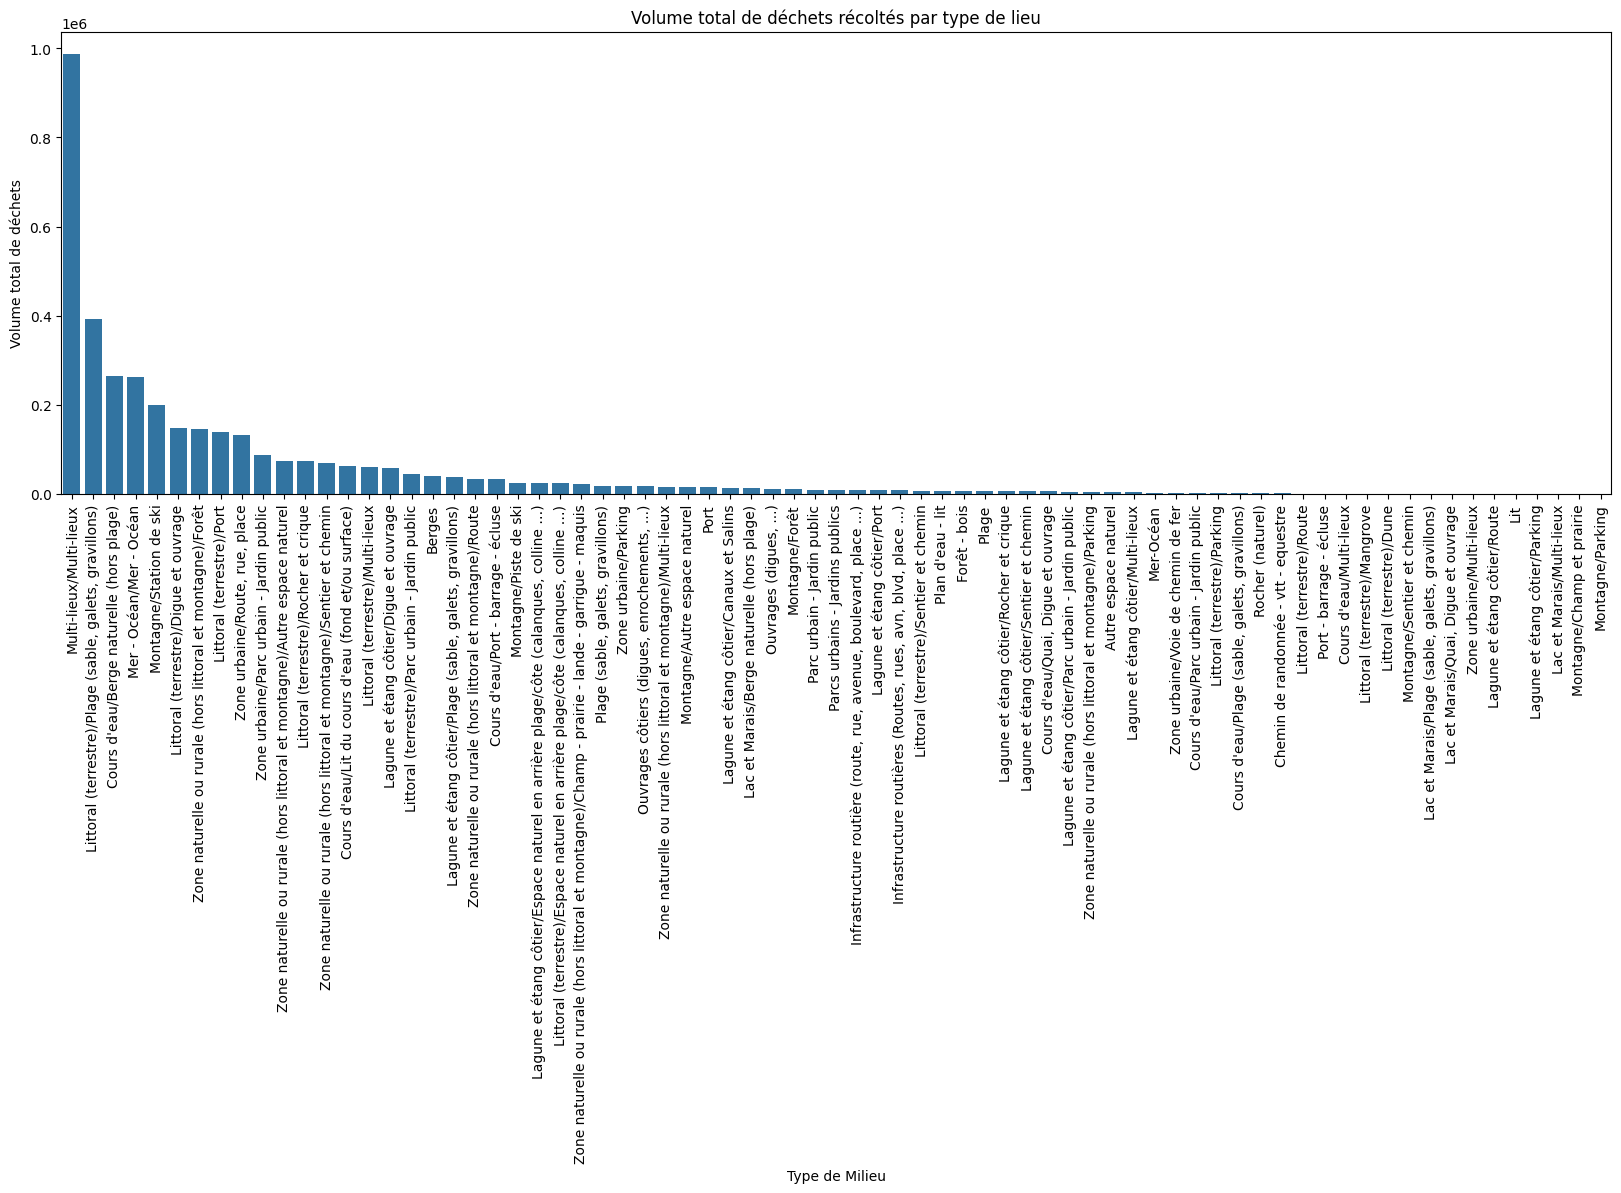

In [45]:
# Grouper par 'TYPE_MILIEU' uniquement et sommer les volumes totaux pour chaque type de milieu
df_volumes_par_milieu = df_enriched_bdd_zds.groupby('TYPE_LIEU')['VOLUME_TOTAL'].sum().reset_index()
df_volumes_par_milieu = df_volumes_par_milieu.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création d'un barplot
plt.figure(figsize=(20, 6))
sns.barplot(data=df_volumes_par_milieu, x='TYPE_LIEU', y='VOLUME_TOTAL')

# Amélioration de l'affichage
plt.xticks(rotation=90)
plt.title('Volume total de déchets récoltés par type de lieu') 
plt.xlabel('Type de Milieu')
plt.ylabel('Volume total de déchets') 

Text(0, 0.5, 'Volume total de déchets')

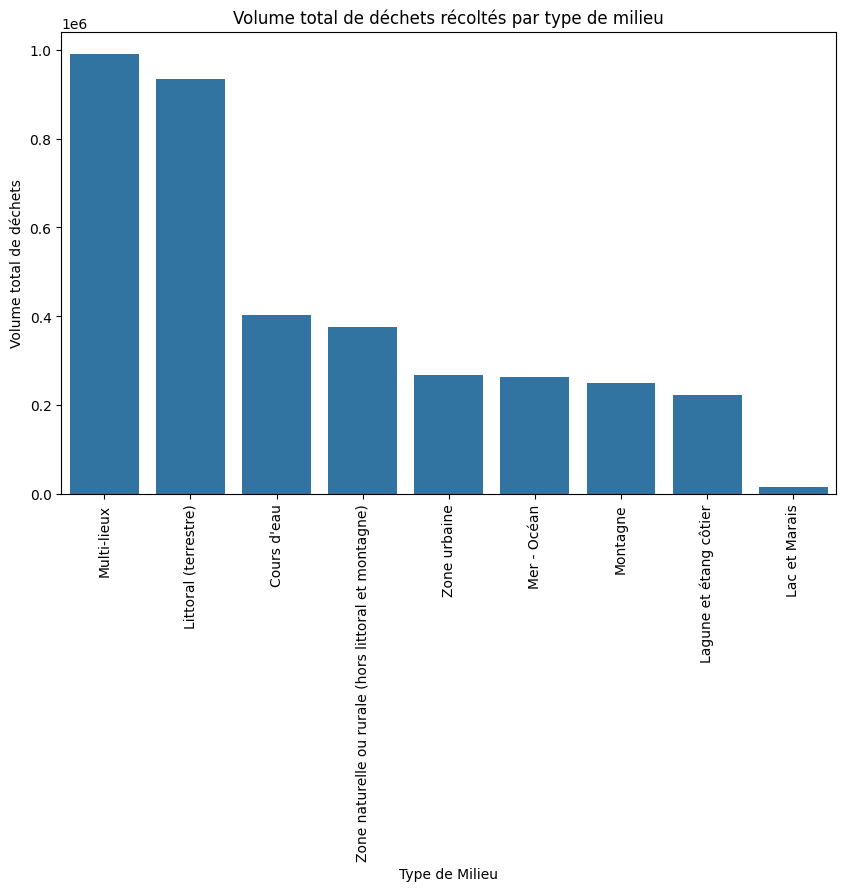

In [46]:
# Grouper par 'TYPE_MILIEU' uniquement et sommer les volumes totaux pour chaque type de milieu
df_volumes_par_milieu = df_enriched_bdd_zds.groupby('TYPE_MILIEU')['VOLUME_TOTAL'].sum().reset_index()
df_volumes_par_milieu = df_volumes_par_milieu.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création d'un barplot avec le volume total par type de milieu
plt.figure(figsize=(10, 6))
sns.barplot(data=df_volumes_par_milieu, x='TYPE_MILIEU', y='VOLUME_TOTAL')

# Amélioration de l'affichage
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Volume total de déchets récoltés par type de milieu') 
plt.xlabel('Type de Milieu')
plt.ylabel('Volume total de déchets')

# Onglet DATA

Cet onglet souhaites répondre à la question suivante :
Quels impacts sur les milieux naturels et quels sont les comportements/ usages / Secteurs economiques à l’origine de cette pollution / macrodechets ?
Typologie 	des Materiaux
Top dechets comptés
Typologie des dechets (Si Niveau 4)
Secteurs économiques concernés, filieres REP concernées
Filtres par milieu/lieu pour chacune des informations
Evolutions dans le temps

Pour ce travail préalable sur cet onglet pour définir les metrics et visualisations à retourner nous nous focaliseront sur la collectivité "REGION PACA"

Remarques , code couleurs par materiaux voir dans la charte, comparer molieu et lieux, pour le donut eliminer les comptages avec autre de plus de 20%
graphe du bas : milieu avec moins de 5 releves non pris en compte


In [47]:
df_data_releve_nb_dechet.head(5)

ID_RELEVE type_regroupement   categorie  nb_dechet
0         44            GROUPE  ALLUMETTES        0.0
1         45            GROUPE  ALLUMETTES        0.0
2         46            GROUPE  ALLUMETTES        0.0
3        101            GROUPE  ALLUMETTES        0.0
4        102            GROUPE  ALLUMETTES        0.0

In [48]:
df_data_zds_enriched.head(5)

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
0         12    France  Provence-Alpes-Côte d'Azur       13.0   
1         14    France  Provence-Alpes-Côte d'Azur       13.0   
2         16    France  Provence-Alpes-Côte d'Azur       13.0   
3         17    France  Provence-Alpes-Côte d'Azur       13.0   
4         21    France                   Occitanie       34.0   

           LIEU_VILLE  LIEU_CODE_POSTAL  \
0           Marseille           13008.0   
1           Marseille           13008.0   
2              Cassis           13260.0   
3           Marseille           13015.0   
4  Causse-de-la-Selle           34380.0   

                          LIEU_COORD_GPS  LIEU_COORD_GPS_X  LIEU_COORD_GPS_Y  \
0  ["5.3416741728752","43.213786286934"]          5.341674         43.213786   
1  ["5.3429503182801","43.213941067785"]          5.342950         43.213941   
2  ["5.5392828683314","43.226082263728"]          5.539283         43.226082   
3               ["5.363345","43.353322"]          5.363345         43.353322   
4  ["3.6599318889266","43.795834831668"]          3.659932         43.795835   

                                            NOM_ZONE  SPOT_A1S  SPOT_ID  \
0                               Anse de la Maronaise         0      NaN   
1                               Anse de la Maronaise         0      NaN   
2  Vallat dres Brayes et bords des routes des ale...         0      NaN   
3                           La cascade des Aygalades         0      NaN   
4  Gorges de l'Hérault du Barrage de St MArtin de...         0      NaN   

                                           TYPE_LIEU  \
0  Littoral (terrestre)/Plage (sable, galets, gra...   
1  Littoral (terrestre)/Espace naturel en arrière...   
2  Zone naturelle ou rurale (hors littoral et mon...   
3           Cours d'eau/Berge naturelle (hors plage)   
4           Cours d'eau/Berge naturelle (hors plage)   

                                         TYPE_MILIEU  \
0                               Littoral (terrestre)   
1                               Littoral (terrestre)   
2  Zone naturelle ou rurale (hors littoral et mon...   
3                                        Cours d'eau   
4                                        Cours d'eau   

                                          TYPE_LIEU2  \
0                  Plage (sable, galets, gravillons)   
1  Espace naturel en arrière plage/côte (calanque...   
2                                        Multi-lieux   
3                       Berge naturelle (hors plage)   
4                       Berge naturelle (hors plage)   

                            TYPE_DECHET  LONGUEUR_LINEAIRE       SURFACE  \
0                                Echoué             2500.0  5.855528e+04   
1            Présent au sol (abandonné)             2770.0  1.522318e+05   
2            Présent au sol (abandonné)             1500.0  4.347502e+04   
3  Présent au sol (abandonné) et échoué                NaN           NaN   
4  Présent au sol (abandonné) et échoué            18000.0  1.274082e+06   

   ID_EVENEMENT                     NOM_EVENEMENT TYPE_EVENEMENT  \
0           178  Calanques Propres 2019 Maronaise      ramassage   
1           178  Calanques Propres 2019 Maronaise      ramassage   
2           222    Nettoyage du Vallat des Brayes      ramassage   
3           365          Opération Plastic Valley      ramassage   
4           139            De la rivière à la mer      ramassage   

  EVENEMENT_ENVERGURE        DATE  ANNEE               NOM_STRUCTURE  \
0   Calanques Propres  2019-05-25   2019                    MerTerre   
1   Calanques Propres  2019-05-25   2019                    MerTerre   
2   Calanques Propres  2019-05-25   2019              Le Naturoscope   
3   Calanques Propres  2019-05-25   2019  La cité des arts de la rue   
4                 NaN  2019-05-19   2019                  CAP Océans   

   ID_STRUCTURE  NB_PARTICIPANTS  DUREE  NIVEAU_CARAC  VERSION_PROTOCOLE  \
0           145            100.0   

In [49]:
# Filtration sur la région PACA
# Recuperation des ID_RELEVE de la région PACA
df_data_zds_enriched_PACA = df_data_zds_enriched[df_data_zds_enriched["REGION"] == "Provence-Alpes-Côte d'Azur"]
liste_id_releve_PACA = df_data_zds_enriched_PACA['ID_RELEVE'].tolist()
# Filtration du df data sur ces relevés
df_data_releve_nb_dechet_PACA = df_data_releve_nb_dechet[df_data_releve_nb_dechet["ID_RELEVE"].isin(liste_id_releve_PACA)]
df_data_releve_nb_dechet_PACA

ID_RELEVE type_regroupement   categorie  nb_dechet
0              44            GROUPE  ALLUMETTES        0.0
1              45            GROUPE  ALLUMETTES        0.0
2              46            GROUPE  ALLUMETTES        0.0
3             101            GROUPE  ALLUMETTES        0.0
4             102            GROUPE  ALLUMETTES        0.0
...           ...               ...         ...        ...
293299       3150           SECTEUR        VIDE        2.0
293300       3153           SECTEUR        VIDE        2.0
293303       3158           SECTEUR        VIDE        0.0
293305       3161           SECTEUR        VIDE        0.0
293311       3177           SECTEUR        VIDE        0.0

[155418 rows x 4 columns]

## Sous onglet "Typologie des materiaux"

Dans ce sous onglet onglet nous chercherons à comprendre quelles sont les quantités et parts des différents materiaux recoltés au cours des ramassages\
un filtre sur les années, un filtre milieu et un filtre lieu nous permettront de visualiser les resultats de façon plus fine
1. Metrics : un total pour chaque materiau et sa part en pourcentage
2. graphique : un barplot et donut chart

In [50]:
df_materiaux = df_data_zds_enriched_PACA.copy()

In [51]:
# Filtration sur les années et les types milieux lieu, puis :

# Filtrer sur les relevés dont la part de AUTRES est inférieure à 20% ou inférieure à 500L

df_materiaux = df_materiaux[df_materiaux["GLOBAL_POURCENTAGE_AUTRE"]<20]
df_materiaux = df_materiaux[df_materiaux["GLOBAL_VOLUME_AUTRE"]<500]

# Recuperation nombre comptages totaux et volume total :

nb_comptages_materiaux = len(df_materiaux)
volume_total_materiaux = df_materiaux["VOLUME_TOTAL"].sum()

# Calcul des totaux pour chaque catégorie de volume
total_volumes = df_materiaux[['GLOBAL_VOLUME_PLASTIQUE', 'GLOBAL_VOLUME_CAOUTCHOUC', 
                         'GLOBAL_VOLUME_BOIS', 'GLOBAL_VOLUME_TEXTILE', 
                         'GLOBAL_VOLUME_PAPIER', 'GLOBAL_VOLUME_METAL', 
                         'GLOBAL_VOLUME_VERRE', 'GLOBAL_VOLUME_AUTRE']].sum()

# Création d'un DataFrame à partir des totaux
df_totals = pd.DataFrame(total_volumes, columns=['Total'])

# Calcul des pourcentages pour chaque catégorie par rapport au total global
df_totals['Pourcentage'] = (df_totals['Total'] / df_totals['Total'].sum()) * 100

# Renommage des index en enlevant "GLOBAL_VOLUME_"
df_totals.index = df_totals.index.str.replace("GLOBAL_VOLUME_", "")


df_totals

Total  Pourcentage
PLASTIQUE   344433.076116    41.471939
CAOUTCHOUC   68340.683370     8.228654
BOIS         45270.678601     5.450878
TEXTILE      36316.446470     4.372732
PAPIER       49636.073105     5.976500
METAL       176057.926033    21.198497
VERRE        82852.384005     9.975955
AUTRE        27613.522300     3.324844

### Barplot materiaux

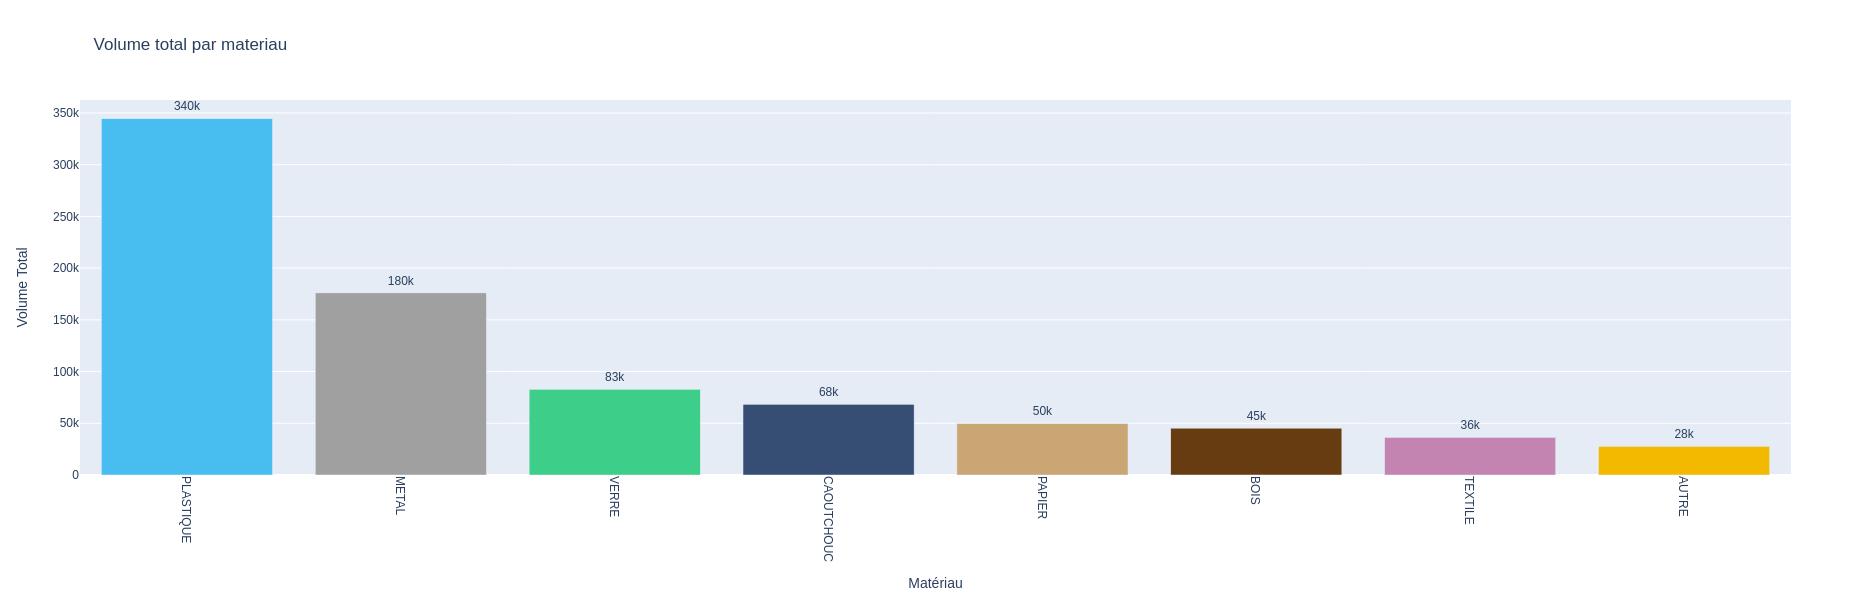

In [52]:
# Préparation des données: tri en ordre descendant selon le total
df_totals_sorted = df_totals.sort_values(by='Total', ascending=False).reset_index()


colors_map = {
    'PLASTIQUE': '#48BEF0',
    'CAOUTCHOUC': '#364E74',
    'BOIS': '#673C11',
    'TEXTILE': '#C384B1',
    'PAPIER': '#CAA674',
    'METAL': '#A0A0A0',
    'VERRE': '#3DCE89',
    'AUTRE': '#F3B900'
}

# Création du graphique en barres avec Plotly Express
fig = px.bar(df_totals_sorted, 
             x='index', 
             y='Total', 
             text='Total',
             labels={'index': 'Matériau', 'Total': 'Volume Total'},
             title='Volume total par materiau',
             color='index',
             color_discrete_map=colors_map)

# Amélioration du graphique
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=400, height=600, uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=90, showlegend=False)

# Affichage du graphique
fig.show()

### Donut materiaux

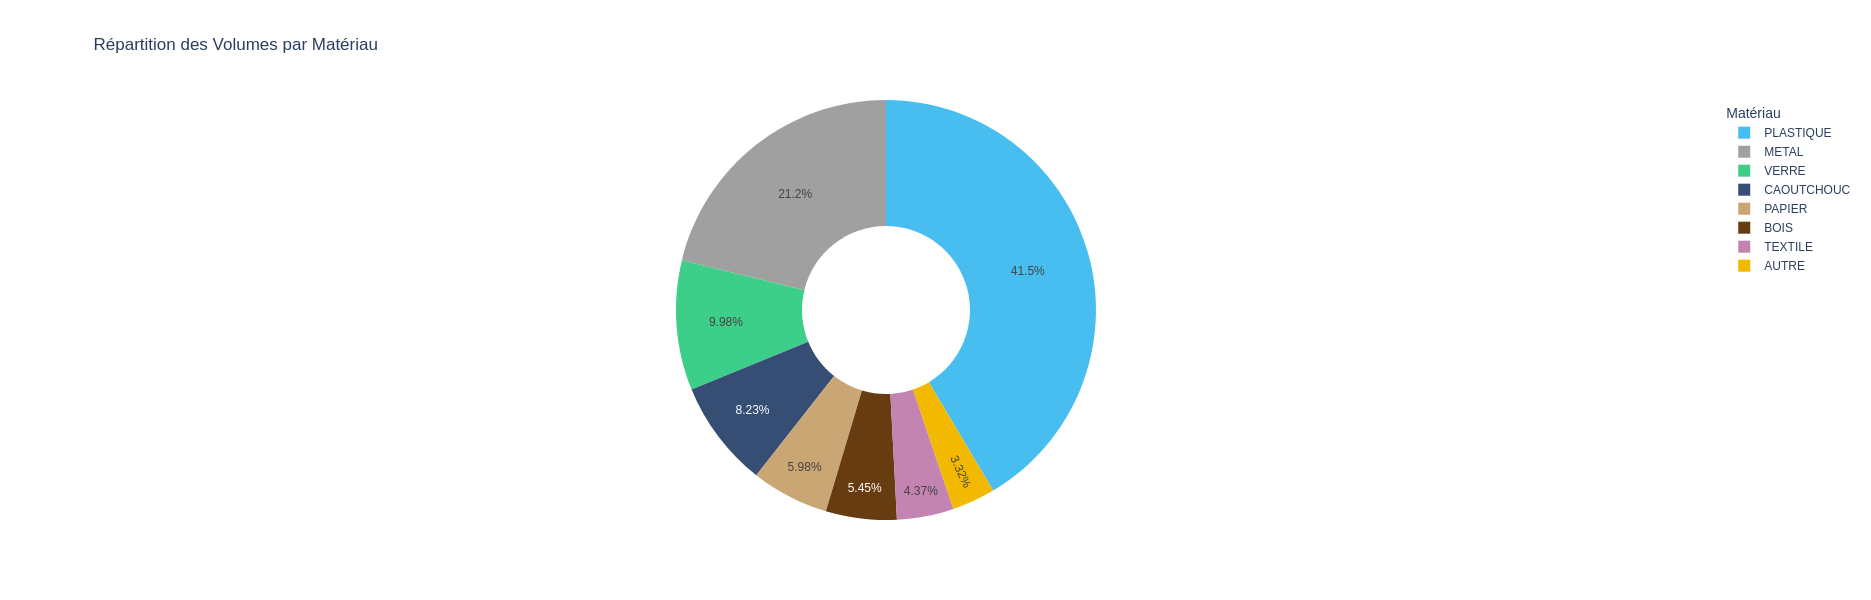

In [53]:
# Préparation des données: tri en ordre descendant selon le total
df_totals_sorted = df_totals.sort_values(by='Total', ascending=False).reset_index()


colors_map = {
    'PLASTIQUE': '#48BEF0',
    'CAOUTCHOUC': '#364E74',
    'BOIS': '#673C11',
    'TEXTILE': '#C384B1',
    'PAPIER': '#CAA674',
    'METAL': '#A0A0A0',
    'VERRE': '#3DCE89',
    'AUTRE': '#F3B900'
}

# Création du diagramme en donut en utilisant le dictionnaire de couleurs pour la correspondance
fig = px.pie(df_totals_sorted, 
             values='Total', 
             names='index',
             title='Répartition des Volumes par Matériau',
             hole=0.4,
             color='index',  # Utilisation de 'index' pour le mappage des couleurs
             color_discrete_map=colors_map)  # Application du dictionnaire de mappage de couleurs

# Amélioration de l'affichage
fig.update_traces(textinfo='percent')
fig.update_layout(width=800, height=600,
                  legend_title_text='Matériau')

# Affichage du graphique
fig.show()

## Sous onglet "Top dechets"

Dans cet onglet nous chercherons à visualiser, apres filtrage année et type milieu et type lieu les top dechets récoltés sur la collectivité\

1. Metric des 10 top dechets récoltés
2. Bubble map sur un des 10 top dechet recoltés (filtre avec choix entre un des 10 top dechets)


In [54]:
# Préparation des dataframe top dechets
df_top = df_data_releve_nb_dechet_PACA.copy()
df_top_data_releves_PACA = df_data_zds_enriched_PACA.copy()

### Tableau metrics top 10 dechets

In [55]:
df_top.head(5)

ID_RELEVE type_regroupement   categorie  nb_dechet
0         44            GROUPE  ALLUMETTES        0.0
1         45            GROUPE  ALLUMETTES        0.0
2         46            GROUPE  ALLUMETTES        0.0
3        101            GROUPE  ALLUMETTES        0.0
4        102            GROUPE  ALLUMETTES        0.0

In [56]:
# Filtration sur les type-regroupement
df_dechets_groupe = df_top[df_top["type_regroupement"].isin(['GROUPE'])]

# Group by 'categorie', sum up 'nb_dechet', and get the top 10 most present wastes
df_top10_dechets = df_dechets_groupe.groupby("categorie").agg({"nb_dechet": "sum"}).sort_values(by="nb_dechet", ascending=False).head(10)
df_top10_dechets

nb_dechet
categorie                                     
MÉGOTS                               1912980.0
FRAGMENTS PLASTIQUE NON-IDENTIFIÉS    108233.0
BOUTEILLES EN VERRE                    88779.0
BOUTEILLES EN PLASTIQUE ALIMENTAIRE    79968.0
TIRETTES ET CAPSULES                   74362.0
CANETTES                               73898.0
BOUCHONS PLASTIQUE                     62184.0
EMBALLAGES ALIMENTAIRES PLASTIQUE      31966.0
BÂTONS DE SUCETTE                      15622.0
COTONS-TIGES                           13857.0

In [57]:
# Code couleur charte merterre
df_corr_dechets_materiau.head()

uuid  \
0  13ce31bc-df6b-494d-9278-300b6603b1e5   
1  2399eefc-d989-4f6b-9f2f-c5e028acb0a6   
2  e1a42c45-1d31-4acd-93eb-1a52551056b7   
3  4a713189-8f33-4391-a8d8-0c7fbb59aa59   
4  a2b98154-a282-46b6-8c6f-142126bae35d   

                                            value  \
0             batterie_remed_nom_dechet_thesaurus   
1        boites_appats_remed_nom_dechet_thesaurus   
2  bouteille_plastique_remed_nom_dechet_thesaurus   
3      bouteille_verre_remed_nom_dechet_thesaurus   
4        canette_metal_remed_nom_dechet_thesaurus   

                                                data  \
0  {"codeDcsmm": "G193", "codeOspar": "89", "mate...   
1  {"codeDcsmm": "G92", "codeOspar": "48", "mater...   
2  {"codeDcsmm": "G7, G8", "codeOspar": "4", "mat...   
3  {"codeDcsmm": "G200", "codeOspar": "91", "mate...   
4  {"codeDcsmm": "G175", "codeOspar": "78", "mate...   

                    thesaurus description Materiau Affichage niv3  \
0  remed_nom_dechet_thesaurus         NaN                     NaN   
1  remed_nom_dechet_thesaurus         NaN                     NaN   
2  remed_nom_dechet_thesaurus         NaN                     NaN   
3  remed_nom_dechet_thesaurus         NaN                     NaN   
4  remed_nom_dechet_thesaurus         NaN                     NaN   

  statut déchet niv2    deleted_at          Niveau  \
0                NaN  44473.452083  INDICATEUR (1)   
1                NaN  44473.451389  INDICATEUR (1)   
2                NaN           NaN  INDICATEUR (1)   
3                NaN           NaN  INDICATEUR (1)   
4                NaN           NaN  INDICATEUR (1)   

       Libellé de regroupement dataviz                       Libellé déchet  \
0                            Batteries                            Batteries   
1                      Boîtes d’appâts                      Boîtes d'appâts   
2  Bouteilles en plastique alimentaire  Bouteilles en plastique alimentaire   
3                  Bouteilles en verre                  Bouteilles en verre   
4                             Canettes                    Canettes en métal   

   generic  mountainWaste Code DCSMM Code OSPAR              TypeCode jCode  \
0      NaN            NaN       G193         89                   NaN   NaN   
1      NaN            NaN        G92         48            pl_fi_bte_   J92   
2      NaN            NaN     G7, G8          4                   NaN   NaN   
3      NaN            NaN       G200         91       gc_nn_b&c_bott_  J200   
4      NaN            NaN       G175         78  me_fc_b&c_cans_bevg_  J175   

   Matériaux DCSMM Catégorie DCSMM Plastique Matériaux ADEME  \
0            Métal                       NaN          Métaux   
1        Plastique                       NaN       Plastique   
2        Plastique                       NaN       Plastique   
3  Verre/Céramique                       NaN           Verre   
4            Métal                       NaN          Métaux   

                          Usage      Secteur économique  \
0        Transports automobiles  Transport / Automobile   
1  Chasse, pêche et aquaculture                   Pêche   
2              Déchets ménagers            Alimentation   
3              Déchets ménagers            Alimentation   
4              Déchets ménagers            Alimentation   

                             REP Modifié ?  
0         Piles et accumulateurs       NaN  
1                Engins de pêche       NaN  
2  Déchets d'emballages ménagers       NaN  
3  Déchets d'emballages ménagers       NaN  
4  Déchets d'emballages ménagers       NaN

In [58]:
# Création de la liste des dechets dans le fichier de correspondances materiaux et passage en majuscule
liste_dechets_corr = df_corr_dechets_materiau["Libellé déchet"].unique().tolist()
liste_dechets_corr_upper = [element.upper() for element in liste_dechets_corr]

# Recherche des elements inclus dans liste des dechets goupe et non dans liste de correspondance
liste_dechet_groupe = df_dechets_groupe["categorie"].unique().tolist()
elements_non_inclus = [element for element in liste_dechet_groupe if element not in liste_dechets_corr_upper]
print("Éléments de liste1 non présents dans liste2 :", elements_non_inclus)
len(elements_non_inclus)

Éléments de liste1 non présents dans liste2 : ['ALLUMETTES', 'AMPOULES ET NÉONS', 'AUTRES DÉCHETS DE LA PÊCHE', 'AUTRES DÉCHETS DU TABAC', "AUTRES OBJETS D'HYGIÈNE ET DE SOINS PERSONNELS", 'AUTRES OBJETS EN BOIS', 'AUTRES OBJETS EN MÉTAL', 'AUTRES OBJETS EN PAPIER/CARTON', 'AUTRES OBJETS EN VERRE/CÉRAMIQUE', 'AUTRES OBJETS ET FRAGMENTS DE TEXTILE', 'AUTRES OBJETS ET FRAGMENTS EN CAOUTCHOUC', 'AUTRES OBJETS SANITAIRE ET MÉDICAUX', 'BALAIS ET OUTILS', 'BOIS ALIMENTAIRE', 'BOITES ET FÛTS EN METAL', 'BOUCHONS PLASTIQUE', 'BOUTEILLES ET CONTENANTS NON ALIMENTAIRES', 'BOUÉES', 'BOÎTES D’APPÂTS', 'BÂTONS DE SKI', 'CAISSES EN BOIS', 'CARTOUCHES DE CHASSE', 'CD ET DVD', 'CIRE ET BOUGIES', 'COTONS-TIGES EN CARTON', "DÉCHETS DE COLIS ET D'EMBALLAGES INDUSTRIELS", "DÉCHETS DE L'AGRICULTURE", 'DÉCHETS DE LA CONCHYLICULTURE', 'DÉCHETS DE LA CONSTRUCTION', 'EMBALLAGES ALIMENTAIRES PAPIER/CARTON', 'EMBALLAGES NON ALIMENTAIRES', 'FIBRE DE VERRE', 'FILS ET CABLES EN MÉTAL', 'FOURNITURES DE BUREAU', 'FRA

55

In [59]:
# creation d'un dataframe de correspondance pour les dechets communs aux 2 listes
df_dict_corr_dechet_materiau = df_corr_dechets_materiau[["Libellé déchet", "Matériaux DCSMM"]].copy()
df_dict_corr_dechet_materiau["Libellé déchet"] = df_dict_corr_dechet_materiau["Libellé déchet"].str.upper()
df_dict_corr_dechet_materiau.head()

Libellé déchet  Matériaux DCSMM
0                            BATTERIES            Métal
1                      BOÎTES D'APPÂTS        Plastique
2  BOUTEILLES EN PLASTIQUE ALIMENTAIRE        Plastique
3                  BOUTEILLES EN VERRE  Verre/Céramique
4                    CANETTES EN MÉTAL            Métal

In [60]:
# Code couleur charte merterre
df_dict_corr_dechet_materiau["Matériaux DCSMM"].unique()

array(['Métal', 'Plastique', 'Verre/Céramique', 'Multi-Matériaux',
       'Vêtement/Textile', 'Papier/Carton', 'Caoutchouc',
       'Bois manufacturé', 'Composés chimiques', 'Autres'], dtype=object)

In [61]:
# Ajout de lignes pour les 55 elements restants
df_dict_corr_dechet_materiau_extension = pd.DataFrame({ "Libellé déchet" : ['ALLUMETTES',
                                                                            'AMPOULES ET NÉONS',
                                                                            'AUTRES DÉCHETS DE LA PÊCHE',
                                                                            'AUTRES DÉCHETS DU TABAC',
                                                                            "AUTRES OBJETS D'HYGIÈNE ET DE SOINS PERSONNELS",
                                                                            'AUTRES OBJETS EN BOIS',
                                                                            'AUTRES OBJETS EN MÉTAL',
                                                                            'AUTRES OBJETS EN PAPIER/CARTON',
                                                                            'AUTRES OBJETS EN VERRE/CÉRAMIQUE',
                                                                            'AUTRES OBJETS ET FRAGMENTS DE TEXTILE',
                                                                            'AUTRES OBJETS ET FRAGMENTS EN CAOUTCHOUC',
                                                                            'AUTRES OBJETS SANITAIRE ET MÉDICAUX',
                                                                            'BALAIS ET OUTILS',
                                                                            'BOIS ALIMENTAIRE',
                                                                            'BOITES ET FÛTS EN METAL',
                                                                            'BOUCHONS PLASTIQUE',
                                                                            'BOUTEILLES ET CONTENANTS NON ALIMENTAIRES',
                                                                            'BOUÉES',
                                                                            'BOÎTES D’APPÂTS',
                                                                            'BÂTONS DE SKI',
                                                                            'CAISSES EN BOIS',
                                                                            'CARTOUCHES DE CHASSE',
                                                                            'CD ET DVD',
                                                                            'CIRE ET BOUGIES',
                                                                            'COTONS-TIGES EN CARTON',
                                                                            "DÉCHETS DE COLIS ET D'EMBALLAGES INDUSTRIELS",
                                                                            "DÉCHETS DE L'AGRICULTURE",
                                                                            'DÉCHETS DE LA CONCHYLICULTURE',
                                                                            'DÉCHETS DE LA CONSTRUCTION',
                                                                            'EMBALLAGES ALIMENTAIRES PAPIER/CARTON',
                                                                            'EMBALLAGES NON ALIMENTAIRES',
                                                                            'FIBRE DE VERRE',
                                                                            'FILS ET CABLES EN MÉTAL',
                                                                            'FOURNITURES DE BUREAU',
                                                                            'FRAGMENTS DE BOIS',
                                                                            'FRAGMENTS DE MÉTAL',
                                                                            'FRAGMENTS DE VERRE/CÉRAMIQUE',
                                                                            'FRAGMENTS PLASTIQUE NON-IDENTIFIÉS',
                                                                            "FUSÉES ET FEUX D'ARTIFICE",
                                                                            'GRANULÉS PLASTIQUES INDUSTRIELS',
                                                                            'JOURNAUX',
                                                                            'MASQUES',
                                                                            'MATÉRIAUX DE CONSTRUCTION',
                                                                            'MATÉRIELS SPORTS NAUTIQUES',
                                                                            'MORCEAUX DE PAPIER',
                                                                            'MOUCHOIRS',
                                                                            'OBJETS BEAUTÉ',
                                                                            'OBJETS BRICOLAGE, TRAVAUX ET ENTRETIEN',
                                                                            'PIÈCES DE VEHICULES',
                                                                            'PRODUITS CHIMIQUES',
                                                                            "PROTOXYDE D'AZOTE",
                                                                            'SACS EN TEXTILE',
                                                                            'SKIS ET CHAUSSURES DE SKI',
                                                                            'TETRAPACKS',
                                                                            'TUYAUX'],
                                                      "Matériaux DCSMM" : ["Bois manufacturé",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Bois manufacturé",
                                                                           "Métal",
                                                                           "Papier/Carton",
                                                                           "Verre/Céramique",
                                                                           "Vêtement/Textile",
                                                                           "Caoutchouc",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Bois manufacturé",
                                                                           "Métal",
                                                                           "Plastique",
                                                                           "Multi-Matériaux",
                                                                           "Plastique",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Bois manufacturé",
                                                                           "Multi-Matériaux",
                                                                           "Plastique",
                                                                           "Autres",
                                                                           "Papier/Carton",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Papier/Carton",
                                                                           "Multi-Matériaux",
                                                                           "Autres", "Métal",
                                                                           "Multi-Matériaux",
                                                                           "Bois manufacturé",
                                                                           "Métal",
                                                                           "Verre/Céramique",
                                                                           "Plastique",
                                                                           "Multi-Matériaux",
                                                                           "Plastique",
                                                                           "Papier/Carton",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Papier/Carton",
                                                                           "Papier/Carton",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux",
                                                                           "Composés chimiques",
                                                                           "Composés chimiques",
                                                                           "Multi-Matériaux",
                                                                           "Vêtement/Textile",
                                                                           "Multi-Matériaux",
                                                                           "Multi-Matériaux"]})


df_dict_corr_dechet_materiau = pd.concat([df_dict_corr_dechet_materiau, df_dict_corr_dechet_materiau_extension], ignore_index=True)
df_dict_corr_dechet_materiau

Libellé déchet     Matériaux DCSMM
0                              BATTERIES               Métal
1                        BOÎTES D'APPÂTS           Plastique
2    BOUTEILLES EN PLASTIQUE ALIMENTAIRE           Plastique
3                    BOUTEILLES EN VERRE     Verre/Céramique
4                      CANETTES EN MÉTAL               Métal
..                                   ...                 ...
407                    PROTOXYDE D'AZOTE  Composés chimiques
408                      SACS EN TEXTILE     Multi-Matériaux
409            SKIS ET CHAUSSURES DE SKI    Vêtement/Textile
410                           TETRAPACKS     Multi-Matériaux
411                               TUYAUX     Multi-Matériaux

[412 rows x 2 columns]

In [62]:
# verification que tous les elements sont inclus
liste_dechet_groupe = df_dechets_groupe["categorie"].unique().tolist()
elements_non_inclus = [element for element in liste_dechet_groupe if element not in df_dict_corr_dechet_materiau["Libellé déchet"].tolist()]
print("Éléments de liste1 non présents dans liste2 :", elements_non_inclus)
len(elements_non_inclus)

Éléments de liste1 non présents dans liste2 : []


0

In [63]:
df_dict_corr_dechet_materiau['Libellé déchet'].unique()

array(['BATTERIES', "BOÎTES D'APPÂTS",
       'BOUTEILLES EN PLASTIQUE ALIMENTAIRE', 'BOUTEILLES EN VERRE',
       'CANETTES EN MÉTAL', 'BOUCHONS EN PLASTIQUE (TOUT USAGE)',
       'BOUTEILLES EN PLASTIQUE ALIMENTAIRE (TOUTE TAILLE)',
       'BOUTEILLES PLASTIQUE NON ALIMENTAIRES (TOUT USAGE)',
       'CHAUSSURES (TOUT MATERIAU)',
       'CORDAGES ET FICELLES (TOUTE TAILLE)',
       'FILETS DE PÊCHE (TOUTE TAILLE)',
       'GOBELETS EN PLASTIQUE (TOUT TYPE)', 'JOUETS (TOUT TYPE)',
       'MASQUES (TOUT TYPE)',
       'MATÉRIELS DE PÊCHE (TOUT TYPE; HORS FILS, FILETS ET PLOMBS)',
       'MOUSSES SYNTHÉTIQUES (TOUT TYPE)',
       'PROTECTIONS HYGIÉNIQUES (TOUT TYPE)',
       'SACS PLASTIQUE (TOUT TYPE)',
       'VAISSELLES EN PLASTIQUE (TOUT TYPE)',
       'FRAGMENTS DE PLASTIQUE (TOUT TYPE, TOUTE TAILLE)',
       'FRAGMENTS DE PLASTIQUE DUR (TOUTE TAILLE)',
       'FRAGMENTS DE FILMS PLASTIQUE (TOUTE TAILLE)',
       'FRAGMENTS DE POLYSTYRÈNE (TOUTE TAILLE)',
       'EMBALLAGES ALIMENTA

In [64]:
# Changement du nom des materiaux pour coller aux catégories de couleurs de la charte graphique
dictionnaire_materiaux = {'Vêtement/Textile': 'Textile',
                             'Papier/Carton': 'Papier/Carton',
                             'Métal': 'Metal',
                             'Verre/Céramique': 'Verre/Céramique',
                             'Multi-Matériaux': 'Autre',
                             'Bois manufacturé': 'Bois',
                             'Composés chimiques': 'Autre',
                             'Autres': 'Autre',
                             'Caoutchouc': 'Caoutchouc',
                             'Plastique': 'Plastique'
                         }

df_dict_corr_dechet_materiau['Matériaux DCSMM'] = df_dict_corr_dechet_materiau['Matériaux DCSMM'].map(dictionnaire_materiaux).fillna(df_dict_corr_dechet_materiau['Libellé déchet'])
df_dict_corr_dechet_materiau.rename(columns={'Libellé déchet': 'categorie'}, inplace=True)
df_dict_corr_dechet_materiau.rename(columns={'Matériaux DCSMM': 'Materiau'}, inplace=True)
df_dict_corr_dechet_materiau = df_dict_corr_dechet_materiau.drop_duplicates(subset='categorie', keep='first')
df_dict_corr_dechet_materiau

categorie         Materiau
0                              BATTERIES            Metal
1                        BOÎTES D'APPÂTS        Plastique
2    BOUTEILLES EN PLASTIQUE ALIMENTAIRE        Plastique
3                    BOUTEILLES EN VERRE  Verre/Céramique
4                      CANETTES EN MÉTAL            Metal
..                                   ...              ...
407                    PROTOXYDE D'AZOTE            Autre
408                      SACS EN TEXTILE            Autre
409            SKIS ET CHAUSSURES DE SKI          Textile
410                           TETRAPACKS            Autre
411                               TUYAUX            Autre

[377 rows x 2 columns]

In [71]:
#export de ce csv dictionnaire materiau dechet groupe
df_dict_corr_dechet_materiau.to_csv(PATH+'dict_dechet_groupe_materiau.csv', index=False)

In [65]:
# ajout de la colonne materiau
df_top10_dechets = df_top10_dechets.merge(df_dict_corr_dechet_materiau, on='categorie', how='left')

In [66]:
df_top10_dechets

categorie  nb_dechet         Materiau
0                               MÉGOTS  1912980.0        Plastique
1   FRAGMENTS PLASTIQUE NON-IDENTIFIÉS   108233.0        Plastique
2                  BOUTEILLES EN VERRE    88779.0  Verre/Céramique
3  BOUTEILLES EN PLASTIQUE ALIMENTAIRE    79968.0        Plastique
4                 TIRETTES ET CAPSULES    74362.0            Metal
5                             CANETTES    73898.0            Metal
6                   BOUCHONS PLASTIQUE    62184.0        Plastique
7    EMBALLAGES ALIMENTAIRES PLASTIQUE    31966.0        Plastique
8                    BÂTONS DE SUCETTE    15622.0        Plastique
9                         COTONS-TIGES    13857.0        Plastique

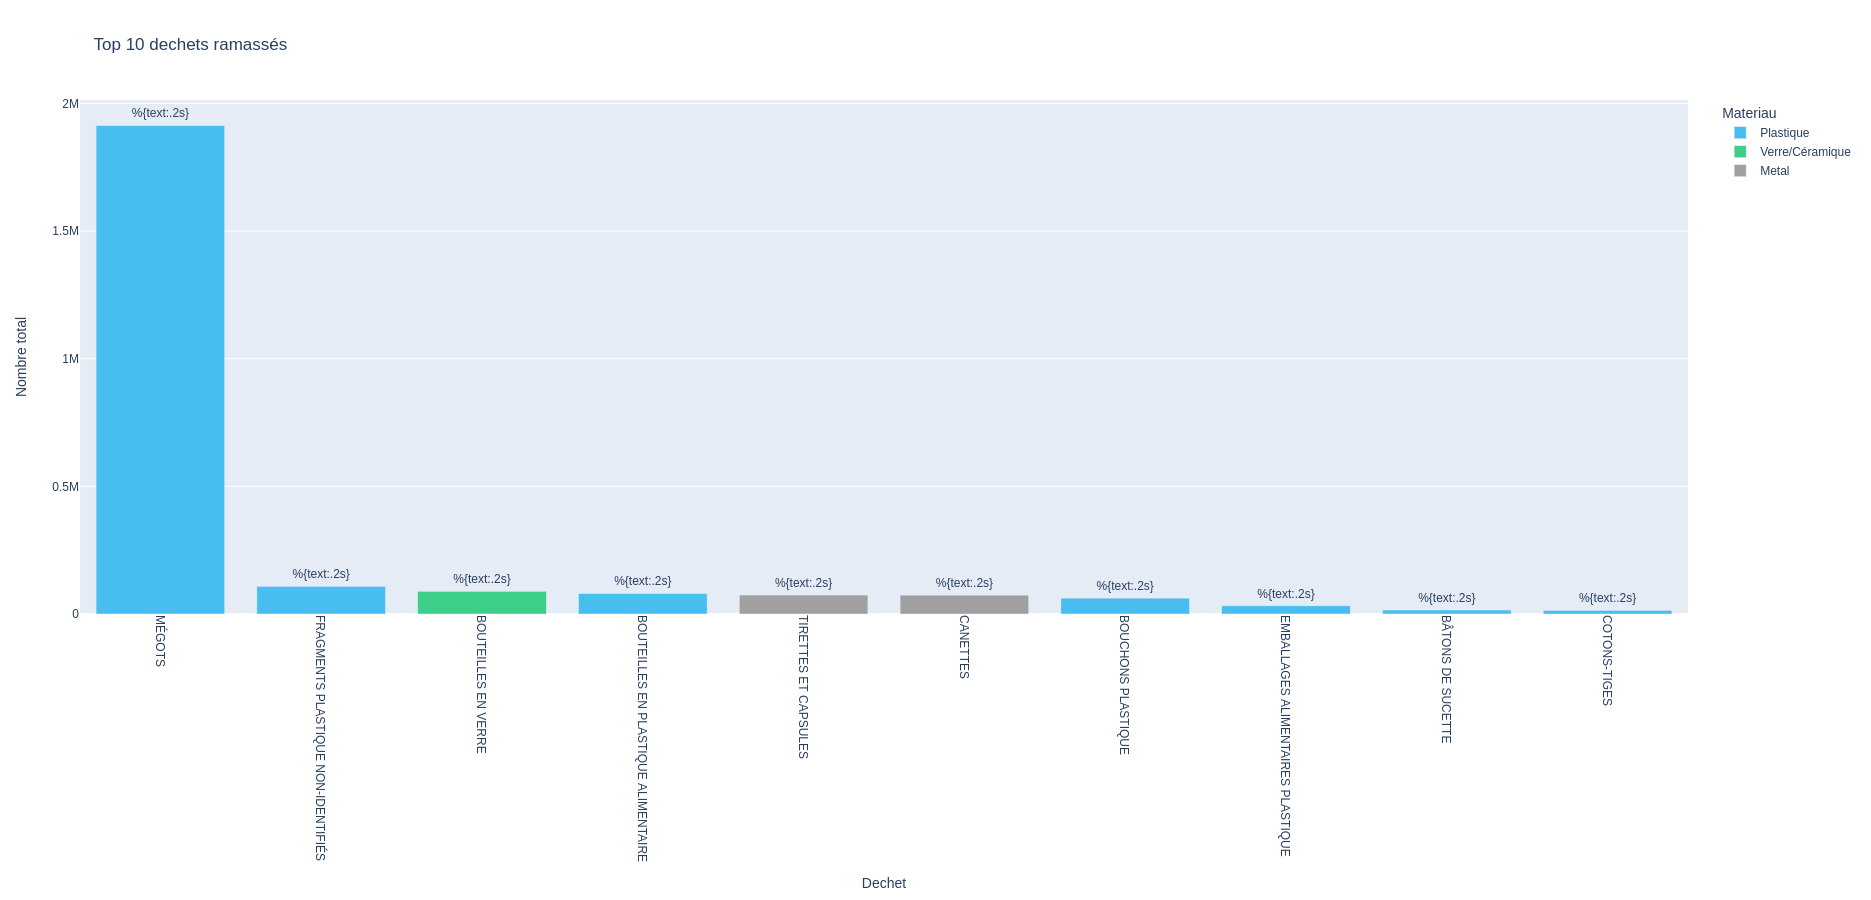

In [70]:
# recuperation de ces 10 dechets dans une liste pour filtration bubble map
noms_top10_dechets = df_top10_dechets.index.tolist()


# Charte graphique MERTERRE :
colors_map = {
        "Textile": "#C384B1",
        "Papier": "#CAA674",
        "Metal": "#A0A0A0",
        "Verre": "#3DCE89",
        "Autre": "#F3B900",
        "Plastique":"#48BEF0",
        "Caoutchouc" : "#364E74",
        "Bois" : "#673C11",
        "Papier/Carton" : "#CAA674",
        "Métal" : "#A0A0A0",
        "Verre/Céramique" : "#3DCE89",
        "Autre" : "#F3B900"
    }

# Barplot
df_top10_dechets.reset_index(inplace=True)
# Création du graphique en barres avec Plotly Express
fig = px.bar(df_top10_dechets, 
             x='categorie', 
             y='nb_dechet',
             labels={'categorie': 'Dechet', 'nb_dechet': 'Nombre total'},
             title='Top 10 dechets ramassés',
             color='Materiau',
             color_discrete_map=colors_map,
             category_orders={"categorie": df_top10_dechets['categorie'].tolist()})

# Amélioration du graphique pour le rendre plus agréable à regarder
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(width=400, height=900, uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=90)

# Affichage du graphique
fig.show()

In [ ]:
# # Filtration sur les type-regroupement
# df_top_dechet_milieu = df_top[df_top["type_regroupement"].isin(['GROUPE'])]
# df_top_dechet_milieu = pd.merge(df_top_dechet_milieu, df_top_data_releves_PACA[['ID_RELEVE', "TYPE_MILIEU"]], on='ID_RELEVE', how='inner')


# # Groupby
# df_top_dechet_milieu = df_top_dechet_milieu.groupby(['categorie', 'TYPE_MILIEU'])['nb_dechet'].sum().reset_index(name='Total')
# df_total_dechets_milieu_type_milieu = df_top_dechet_milieu.pivot(index='categorie', columns='TYPE_MILIEU', values='Total').fillna(0)
# df_total_dechets_milieu_type_milieu['Total'] = df_total_dechets_milieu_type_milieu.iloc[:, 1:].sum(axis=1)
# df_total_dechets_milieu_type_milieu = df_total_dechets_milieu_type_milieu.sort_values(by='Total', ascending=False)
# df_total_dechets_milieu_type_milieu = df_total_dechets_milieu_type_milieu.head(10)
# df_total_dechets_milieu_type_milieu


### Barplot des top dechets

In [ ]:
# df_total_dechets_milieu_type_milieu.reset_index(inplace=True)
# # Création du graphique en barres avec Plotly Express
# fig = px.bar(df_total_dechets_milieu_type_milieu, 
#              x='categorie', 
#              y='Total', 
#              text='Total',
#              labels={'categorie': 'Dechet', 'Total': 'Nombre total'},
#              title='Top 10 dechets ramassés',
#              color_discrete_sequence=['#1951A0']*len(df_total_dechets_milieu_type_milieu))

# # Amélioration du graphique pour le rendre plus agréable à regarder
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(width=400, height=900, uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=90)

# # Affichage du graphique
# fig.show()

### Barplot des milieux du ramassage de ce top dechet

In [ ]:
# df_total_dechets_milieu_type_milieu.set_index("categorie", inplace = True)
# df_total_dechets_milieu_type_milieu.drop('Total', axis=1, inplace=True)
# df_dechet_top_milieux = df_total_dechets_milieu_type_milieu.transpose()

# df_dechet_top_milieux.reset_index(inplace=True)
# df_dechet_top_milieux = df_dechet_top_milieux.sort_values(by='MÉGOTS', ascending=False)

# # Création du graphique
# fig = px.bar(df_dechet_top_milieux, 
#              x='TYPE_MILIEU', 
#              y='MÉGOTS', 
#              text='MÉGOTS',
#              labels={'categorie': 'Type de milieu', 'Total': 'Nombre total'},
#              title='zones de ramassage du dechet',
#              color_discrete_sequence=['#1951A0']*len(df_dechet_top_milieux))

# # Amélioration du graphique
# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig.update_layout(width=700, height=600, uniformtext_minsize=8, uniformtext_mode='hide', xaxis_tickangle=90)

# # Affichage du graphique
# fig.show()

### Bubble map dechet top 10

In [ ]:
#Filtration sur le dechet top 10
df_top_megot = df_top[df_top["categorie"]=="MÉGOTS"]

# Création du df  de travail pour la carte
df_map_data = pd.merge(df_top_megot, df_top_data_releves_PACA, on='ID_RELEVE', how='inner')

# Création de la carte centrée autour de la région PACA
map_paca = folium.Map(location=[43.610769, 3.876716], zoom_start=8, tiles='OpenStreetMap')

# Facteur de normalisation pour ajuster la taille des bulles
normalisation_facteur = 1000

for index, row in df_map_data.iterrows():
    # Application de la normalisation
    radius = row['nb_dechet'] / normalisation_facteur
    
    # Application d'une limite minimale pour le rayon si nécessaire
    radius = max(radius, 1)
    
    folium.CircleMarker(
        location=(row['LIEU_COORD_GPS_Y'], row['LIEU_COORD_GPS_X']),
        radius=radius,  # Utilisation du rayon ajusté
        popup=f"{row['NOM_ZONE']}, {row['LIEU_VILLE']}, {row['DATE']} : {row['nb_dechet']} mégots",
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map_paca)

map_paca

L'API Mapbox permettra d'utiliser des fond de carte satellite pour plotly express

In [ ]:
#Filtration sur le dechet top 10
df_top_megot = df_top[df_top["categorie"]=="MÉGOTS"]

# Création du df  de travail pour la carte
df_map_data = pd.merge(df_top_megot, df_top_data_releves_PACA, on='ID_RELEVE', how='inner')

# Création de la bubble map
fig = px.scatter_geo(df_map_data,
                     lat='LIEU_COORD_GPS_Y',
                     lon='LIEU_COORD_GPS_X',
                     size='nb_dechet',
                     color_discrete_sequence=['#1951A0'],
                     scope='europe',
                     title='Dechets Mégots en PACA',
                     custom_data=['NOM_ZONE', 'LIEU_VILLE', 'nb_dechet','TYPE_MILIEU'])

# Personnalisation des tooltips
fig.update_traces(marker=dict(line=dict(width=0)),
                  selector=dict(mode='markers'),
                  hovertemplate="<b>%{customdata[1]}</b><br>%{customdata[0]}<br>Type de milieu: %{customdata[3]}<br>Mégots : %{customdata[2]}<extra></extra>")


# Ajustements pour afficher un fond de carte
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="RebeccaPurple"
)

# Ajustement de la taille de la carte
fig.update_layout(width=1200, height=800)


# Ajustement du centrage et du zoom de la carte sur la région PACA
fig.update_geos(fitbounds="locations")

# Affichage de la carte
fig.show()

## Sous onglet "Onglet DATA Secteurs economiques, Responsabilité elargie producteur et marques"

In [ ]:
# Filtration par Année, milieu, lieu, puis :

